In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441      01-01-84        Salaried  ...   
1               45                1502      31-07-85   Self employed  ...   
2               45                1497      24-08-85   Self employed  ...   
3               45                1501      30-12-93   Self employed  ...   
4               45                1495      09-12-77   Self employed  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [3]:
df.shape

(233154, 41)

In [4]:
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace('.','_') for i in df.columns]

In [5]:
df.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [6]:
print('The number of duplicates:',df.duplicated().sum())

The number of duplicates: 0


In [7]:
# Dropping the unnecessary features

df.drop(['uniqueid','branch_id','supplier_id','mobileno_avl_flag','current_pincode_id','employee_code_id','manufacturer_id','state_id'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   date_of_birth                        233154 non-null  object 
 4   employment_type                      225493 non-null  object 
 5   disbursaldate                        233154 non-null  object 
 6   aadhar_flag                          233154 non-null  int64  
 7   pan_flag                             233154 non-null  int64  
 8   voterid_flag                         233154 non-null  int64  
 9   driving_flag                         233154 non-null  int64  
 10  passport_flag                        233154 non-null  int64  
 11  perform_cns_s

In [9]:
df.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                          0
pri_overdue_accts                         0
pri_current_balance                       0
pri_sanctioned_amount                     0
pri_disbursed_amount                      0
sec_no_of_accts                           0
sec_active_accts                          0
sec_overdue_accts                         0
sec_current_balance             

In [10]:
# Dropping the rows with Employment Type Null as it constitutes just 3% of data
df = df.dropna()

In [11]:
df.shape

(225493, 33)

In [12]:
df.describe(include='all')

disbursed_amount    asset_cost            ltv date_of_birth  \
count       225493.00000  2.254930e+05  225493.000000        225493   
unique               NaN           NaN            NaN         14417   
top                  NaN           NaN            NaN      01-01-88   
freq                 NaN           NaN            NaN          2143   
mean         54240.72883  7.563113e+04      74.806634           NaN   
std          12775.59006  1.852758e+04      11.441890           NaN   
min          13320.00000  3.700000e+04      13.500000           NaN   
25%          47049.00000  6.562500e+04      68.960000           NaN   
50%          53703.00000  7.080700e+04      76.890000           NaN   
75%          60213.00000  7.896600e+04      83.730000           NaN   
max         987354.00000  1.328954e+06      95.000000           NaN   

       employment_type disbursaldate    aadhar_flag       pan_flag  \
count           225493        225493  225493.000000  225493.000000   
unique               2            84            NaN            NaN   
top      Self employed      31-10-18            NaN            NaN   
freq            127635          8538            NaN            NaN   
mean               NaN           NaN       0.837720       0.077386   
std                NaN           NaN       0.368708       0.267204   
min                NaN           NaN       0.000000       0.000000   
25%                NaN           NaN       1.000000       0.000000   
50%                NaN           NaN       1.000000       0.000000   
75%                NaN           NaN       1.000000       0.000000   
max                NaN           NaN       1.000000       1.000000   

         voterid_flag   driving_flag  ...  sec_sanctioned_amount  \
count   225493.000000  225493.000000  ...           2.254930e+05   
unique            NaN            NaN  ...                    NaN   
top               NaN            NaN  ...                    NaN   
freq              NaN            NaN  ...                    NaN   
mean         0.147127       0.023686  ...           7.489187e+03   
std          0.354233       0.152069  ...           1.860432e+05   
min          0.000000       0.000000  ...           0.000000e+00   
25%          0.000000       0.000000  ...           0.000000e+00   
50%          0.000000       0.000000  ...           0.000000e+00   
75%          0.000000       0.000000  ...           0.000000e+00   
max          1.000000       1.000000  ...           3.000000e+07   

        sec_disbursed_amount primary_instal_amt  sec_instal_amt  \
count           2.254930e+05       2.254930e+05    2.254930e+05   
unique                   NaN                NaN             NaN   
top                      NaN                NaN             NaN   
freq                     NaN                NaN             NaN   
mean            7.371104e+03       1.299246e+04    3.256845e+02   
std             1.854703e+05       1.497084e+05    1.575617e+04   
min             0.000000e+00       0.000000e+00    0.000000e+00   
25%             0.000000e+00       0.000000e+00    0.000000e+00   
50%             0.000000e+00       0.000000e+00    0.000000e+00   
75%             0.000000e+00       2.045000e+03    0.000000e+00   
max             3.000000e+07       2.564281e+07    4.170901e+06   

        new_accts_in_last_six_months  delinquent_accts_in_last_six_months  \
count                  225493.000000                        225493.000000   
unique                           NaN                                  NaN   
top                              NaN                                  NaN   
freq                             NaN                                  NaN   
mean                        0.386602                             0.098708   
std                         0.959668                             0.386376   
min                         0.000000                             0.000000   
25%                         0.000000                             0.000000   

### Dependent variable distribution

In [13]:
pct_loan_default = df['loan_default'].value_counts(normalize=True)*100
pct_loan_default

0    78.28447
1    21.71553
Name: loan_default, dtype: float64

In [14]:
import plotly.express as px 
fig = px.pie(values=pct_loan_default.values, names=['Not defaulted','Defaulted']) 
fig.show()

78.3% observations in the dataset have not defaulted vehicle loan while 21.7% have defaulted loan

## Categorical Features Analysis

### Employment_Type

In [15]:
import plotly.express as px
df1 = pd.crosstab(df['employment_type'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [16]:
df['employment_type'].value_counts(normalize=True)*100

Self employed    56.602644
Salaried         43.397356
Name: employment_type, dtype: float64

In [17]:
print('Percentage of salaried people who have defaulted:',
     np.round(df[(df['employment_type']=='Salaried') & (df['loan_default']==1)].shape[0]/(df[df['employment_type']=='Salaried'].shape[0])*100,3))
print('Percentage of self employed people who have defaulted:',
     np.round(df[(df['employment_type']=='Self employed') & (df['loan_default']==1)].shape[0]/(df[df['employment_type']=='Self employed'].shape[0])*100,3))

Percentage of salaried people who have defaulted: 20.346
Percentage of self employed people who have defaulted: 22.766


### Aadhar

In [18]:
df1 = pd.crosstab(df['aadhar_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [19]:
df['aadhar_flag'].value_counts(normalize=True)*100

1    83.772002
0    16.227998
Name: aadhar_flag, dtype: float64

Most people have given their Aadhar details

In [20]:
print('Percentage of people who have given their Aadhar details and defaulted:',
     np.round(df[(df['aadhar_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['aadhar_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their Aadhar details and defaulted:',
     np.round(df[(df['aadhar_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['aadhar_flag']==0].shape[0])*100,3))

Percentage of people who have given their Aadhar details and defaulted: 20.927
Percentage of people who have not given their Aadhar details and defaulted: 25.786


### PAN

In [21]:
df1 = pd.crosstab(df['pan_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [22]:
df['pan_flag'].value_counts(normalize=True)*100

0    92.261401
1     7.738599
Name: pan_flag, dtype: float64

Very few people have given PAN details

In [23]:
print('Percentage of people who have given their PAN details and defaulted:',
     np.round(df[(df['pan_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['pan_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their PAN details and defaulted:',
     np.round(df[(df['pan_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['pan_flag']==0].shape[0])*100,3))

Percentage of people who have given their PAN details and defaulted: 22.011
Percentage of people who have not given their PAN details and defaulted: 21.691


### Voter ID

In [24]:
df1 = pd.crosstab(df['voterid_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [25]:
df['voterid_flag'].value_counts(normalize=True)*100

0    85.287348
1    14.712652
Name: voterid_flag, dtype: float64

Few people have given their Voter ID details

In [26]:
print('Percentage of people who have given their voter_id details and defaulted:',
     np.round(df[(df['voterid_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['voterid_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their voter_id details and defaulted:',
     np.round(df[(df['voterid_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['voterid_flag']==0].shape[0])*100,3))

Percentage of people who have given their voter_id details and defaulted: 26.26
Percentage of people who have not given their voter_id details and defaulted: 20.932


### DL

In [27]:
df1 = pd.crosstab(df['driving_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [28]:
df['driving_flag'].value_counts(normalize=True)*100

0    97.631412
1     2.368588
Name: driving_flag, dtype: float64

Very few/negligible number of people have given their DL details

In [29]:
print('Percentage of people who have given their DL details and defaulted:',
     np.round(df[(df['driving_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['driving_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their DL details and defaulted:',
     np.round(df[(df['driving_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['driving_flag']==0].shape[0])*100,3))

Percentage of people who have given their DL details and defaulted: 20.24
Percentage of people who have not given their DL details and defaulted: 21.751


### Passport

In [30]:
df1 = pd.crosstab(df['passport_flag'],df['loan_default'])
fig = px.bar(df1, barmode = 'group',width=600,height=400)
fig.show()

In [31]:
df['passport_flag'].value_counts(normalize=True)*100

0    99.786246
1     0.213754
Name: passport_flag, dtype: float64

Very few/negligible number of people have given their Passport details

In [32]:
print('Percentage of people who have given their Passport details and defaulted:',
     np.round(df[(df['passport_flag']==1) & (df['loan_default']==1)].shape[0]/(df[df['passport_flag']==1].shape[0])*100,3))
print('Percentage of people who have not given their Passport details and defaulted:',
     np.round(df[(df['passport_flag']==0) & (df['loan_default']==1)].shape[0]/(df[df['passport_flag']==0].shape[0])*100,3))

Percentage of people who have given their Passport details and defaulted: 14.73
Percentage of people who have not given their Passport details and defaulted: 21.73


In [33]:
#Encoding Employment Type
df['self_employed'] = pd.get_dummies(df['employment_type'],drop_first=True)

In [34]:
df.drop('employment_type',axis=1,inplace=True)
df.head()

disbursed_amount  asset_cost    ltv date_of_birth disbursaldate  \
0             50578       58400  89.55      01-01-84      03-08-18   
1             47145       65550  73.23      31-07-85      26-09-18   
2             53278       61360  89.63      24-08-85      01-08-18   
3             57513       66113  88.48      30-12-93      26-10-18   
4             52378       60300  88.39      09-12-77      26-09-18   

   aadhar_flag  pan_flag  voterid_flag  driving_flag  passport_flag  ...  \
0            1         0             0             0              0  ...   
1            1         0             0             0              0  ...   
2            1         0             0             0              0  ...   
3            1         0             0             0              0  ...   
4            1         0             0             0              0  ...   

   sec_disbursed_amount primary_instal_amt  sec_instal_amt  \
0                     0                  0               0   
1                     0               1991               0   
2                     0                  0               0   
3                     0                 31               0   
4                     0                  0               0   

   new_accts_in_last_six_months  delinquent_accts_in_last_six_months  \
0                             0                                    0   
1                             0                                    1   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   average_acct_age  credit_history_length  no_of_inquiries  loan_default  \
0         0yrs 0mon              0yrs 0mon                0             0   
1        1yrs 11mon             1yrs 11mon                0             1   
2         0yrs 0mon              0yrs 0mon                0             0   
3         0yrs 8mon              1yrs 3mon                1             1   
4         0yrs 0mon              0yrs 0mon                1             1   

   self_employed  
0              0  
1              1  
2              1  
3              1  
4              1  

[5 rows x 33 columns]

#### Feature importances of different categorical features

In [35]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'date_of_birth',
       'disbursaldate', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'self_employed'],
      dtype='object')

In [36]:
df1 = df[['self_employed','aadhar_flag','pan_flag','voterid_flag','driving_flag',
         'passport_flag']]

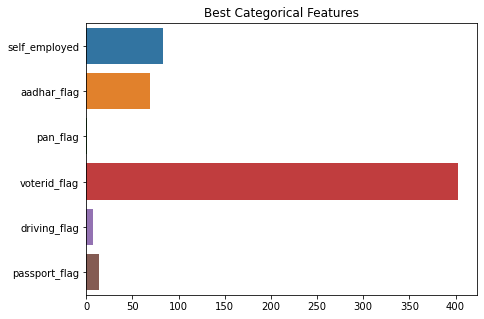

In [37]:
# Feature importances using SelectKBest algorithm using chi2
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

from sklearn.feature_selection import SelectKBest,chi2
n = SelectKBest(score_func=chi2, k='all')
catcols=n.fit(df1,df['loan_default'])
plt.figure(figsize=(7,5))
sns.barplot(x=catcols.scores_,y=df1.columns)
plt.title('Best Categorical Features')
plt.show()

In [38]:
# Feature importances using Extra Trees Classifier
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df1,df['loan_default'])

ExtraTreesClassifier()

In [39]:
pd.DataFrame(model.feature_importances_,index=df1.columns,columns=['Feature_Importance']).sort_values(by='Feature_Importance',ascending=False)

Feature_Importance
voterid_flag             0.292894
aadhar_flag              0.256564
self_employed            0.251081
pan_flag                 0.148590
driving_flag             0.032911
passport_flag            0.017960

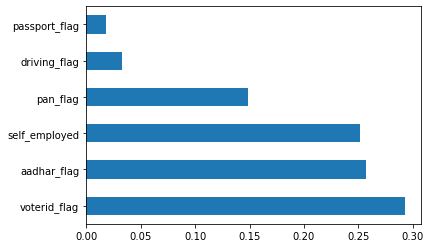

In [40]:
ranked_features=pd.Series(model.feature_importances_,index=df1.columns)
ranked_features.nlargest(6).plot(kind='barh')
plt.show()

In [41]:
# Dropping unncessary features based on the above analysis

df.drop(['pan_flag','driving_flag','passport_flag'],axis=1,inplace=True)

## Numerical Features Analysis

### Disbursed Amount

In [42]:
df['disbursed_amount'].describe()

count    225493.00000
mean      54240.72883
std       12775.59006
min       13320.00000
25%       47049.00000
50%       53703.00000
75%       60213.00000
max      987354.00000
Name: disbursed_amount, dtype: float64

In [43]:
disbursed_amount_non_default = df[df['loan_default']==0]['disbursed_amount']
disbursed_amount_default = df[df['loan_default']==1]['disbursed_amount']

In [44]:
pd.DataFrame([disbursed_amount_non_default.describe(), disbursed_amount_default.describe()], index=['non_defaulters','defaulters'])

count          mean           std      min      25%  \
non_defaulters  176526.0  53707.242282  12906.119631  13320.0  46349.0   
defaulters       48967.0  56163.947454  12099.967718  13369.0  49303.0   

                    50%      75%       max  
non_defaulters  53278.0  59847.0  987354.0  
defaulters      55359.0  61923.0  191392.0

The maximum disbursed amount is way higher for non-defaulters.

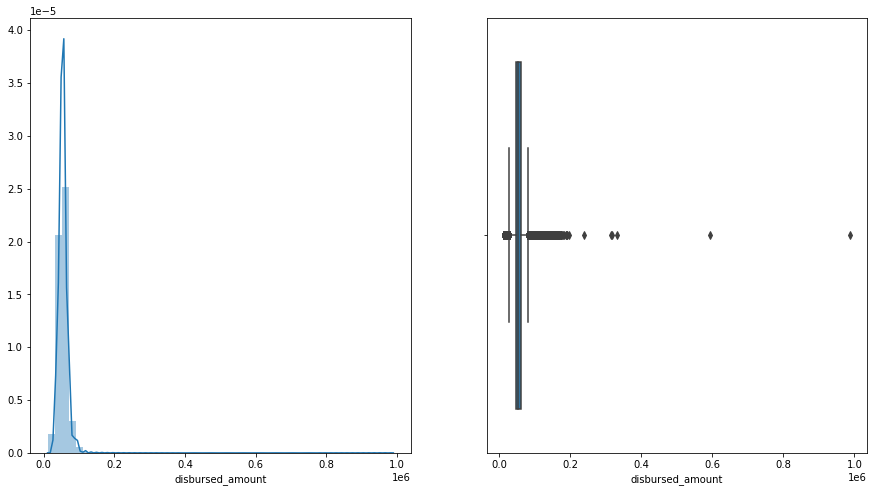

In [45]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['disbursed_amount'])

plt.subplot(1,2,2)
sns.boxplot(df['disbursed_amount'])

plt.show()

The distribution is highly right skewed and there are outliers

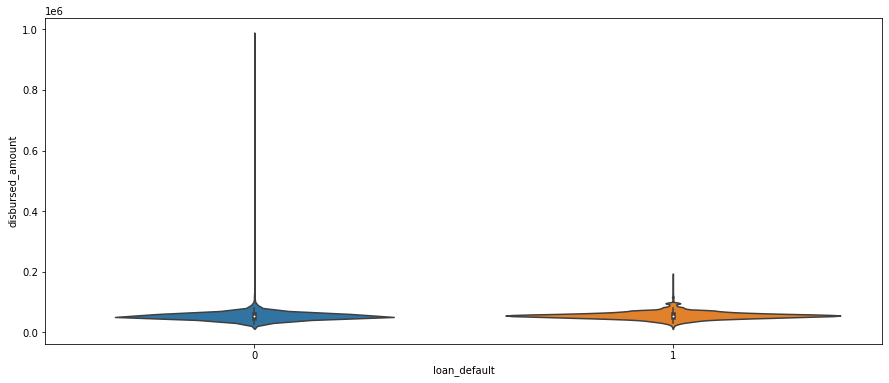

In [46]:
plt.figure(figsize=(15,6))
sns.violinplot(x ='loan_default',y='disbursed_amount',data=df)
plt.show()

More outliers/extreme values are present for non defaulters

### Asset Cost

In [47]:
df['asset_cost'].describe()

count    2.254930e+05
mean     7.563113e+04
std      1.852758e+04
min      3.700000e+04
25%      6.562500e+04
50%      7.080700e+04
75%      7.896600e+04
max      1.328954e+06
Name: asset_cost, dtype: float64

In [48]:
asset_cost_non_default = df[df['loan_default']==0]['asset_cost']
asset_cost_default = df[df['loan_default']==1]['asset_cost']

In [49]:
pd.DataFrame([asset_cost_non_default.describe(), asset_cost_default.describe()], index=['non_defaulters','defaulters'])

count          mean           std      min      25%  \
non_defaulters  176526.0  75478.714484  18506.576196  37000.0  65588.0   
defaulters       48967.0  76180.596504  18592.903319  37000.0  65800.0   

                    50%       75%        max  
non_defaulters  70696.0  78742.75  1328954.0  
defaulters      71205.0  79950.00   281164.0

The maximum asset cost of non defaulters is way higher than that of defaulters

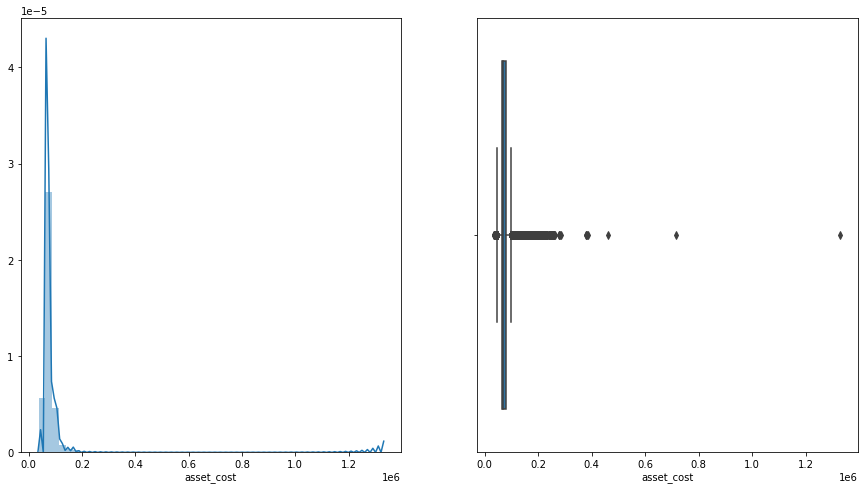

In [50]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['asset_cost'])

plt.subplot(1,2,2)
sns.boxplot(df['asset_cost'])

plt.show()

The distribution is highly right skewed and there are outliers

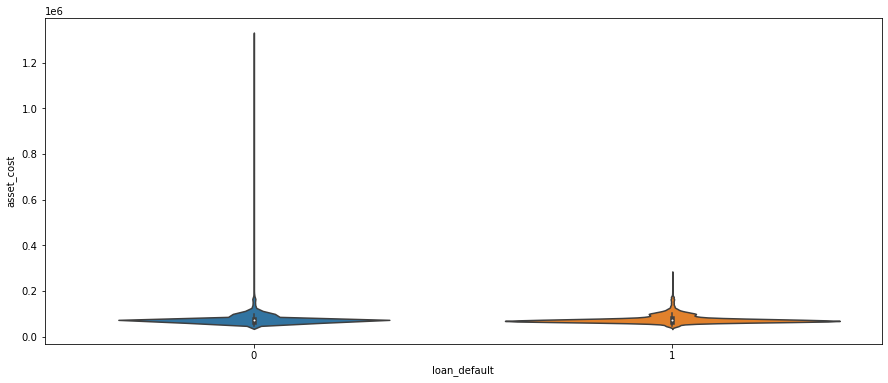

In [51]:
plt.figure(figsize=(15,6))
sns.violinplot(x ='loan_default',y='asset_cost',data=df)
plt.show()

Extreme/outlier values of asset_cost are present among non defaulters

### Ltv

In [52]:
df['ltv'].describe()

count    225493.000000
mean         74.806634
std          11.441890
min          13.500000
25%          68.960000
50%          76.890000
75%          83.730000
max          95.000000
Name: ltv, dtype: float64

In [53]:
ltv_non_default = df[df['loan_default']==0]['ltv']
ltv_default = df[df['loan_default']==1]['ltv']

In [54]:
pd.DataFrame([ltv_non_default.describe(), ltv_default.describe()], index=['non_defaulters','defaulters'])

count       mean        std   min    25%    50%    75%  \
non_defaulters  176526.0  74.216090  11.666502  13.5  68.09  76.09  83.23   
defaulters       48967.0  76.935543  10.315922  15.3  72.13  79.12  84.71   

                 max  
non_defaulters  95.0  
defaulters      95.0

The ltv is almost same for both defaulters and non defaulters

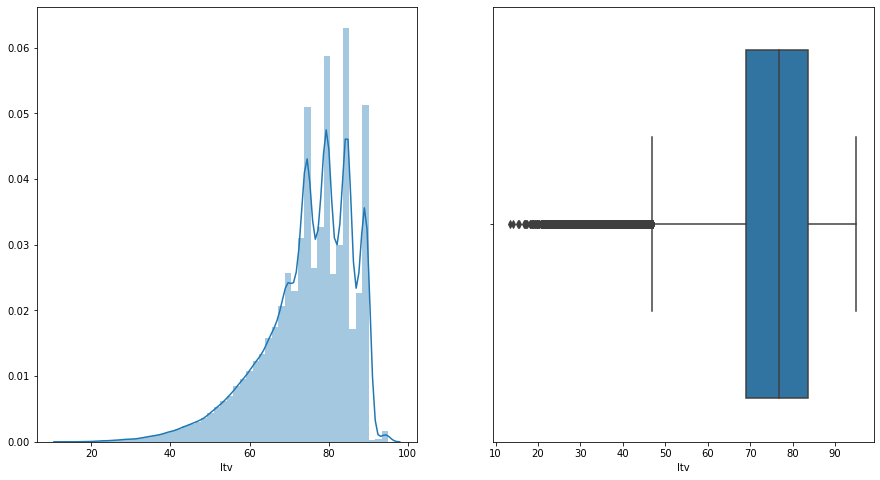

In [55]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['ltv'])

plt.subplot(1,2,2)
sns.boxplot(df['ltv'])

plt.show()

It is left skewed.

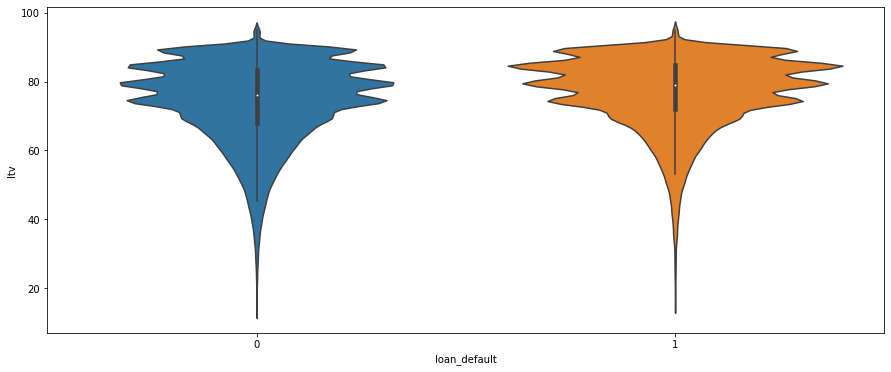

In [56]:
plt.figure(figsize=(15,6))
sns.violinplot(x ='loan_default',y='ltv',data=df)
plt.show()

LTV is almost same for both defaulters and non defaulters

### Age

In [57]:
# We have DOB of the customer and the date of disbursal, from which we need to calculate the age of the customer at the
# time of loan disbursal

def age(dob):
    yr = int(dob.split('-')[2])
    if yr >=0 and yr < 21:
        return yr + 2000
    else:
         return yr + 1900
        
df['date_of_birth'] = df['date_of_birth'].apply(age)
df['disbursaldate'] = df['disbursaldate'].apply(age)
# Age of the customer at the time of disbursement of fund
df['age'] = df['disbursaldate'] - df['date_of_birth']

In [58]:
# Dropping the DOB and Disbursal Date
df.drop(['date_of_birth','disbursaldate'],axis=1,inplace=True)

In [59]:
df['age'].describe()

count    225493.000000
mean         34.448009
std           9.666254
min          20.000000
25%          26.000000
50%          33.000000
75%          41.000000
max          64.000000
Name: age, dtype: float64

In [60]:
age_non_defaulters = df[df['loan_default'] == 0]['age']
age_defaulters = df[df['loan_default'] == 1]['age']

In [61]:
pd.DataFrame([age_non_defaulters.describe(), age_defaulters.describe()], index=['non_defaulters','defaulters'])

count       mean       std   min   25%   50%   75%   max
non_defaulters  176526.0  34.636609  9.697518  20.0  27.0  33.0  41.0  64.0
defaulters       48967.0  33.768109  9.521842  21.0  26.0  32.0  40.0  64.0

All the stats of age are almost same for defaulters and non defaulters

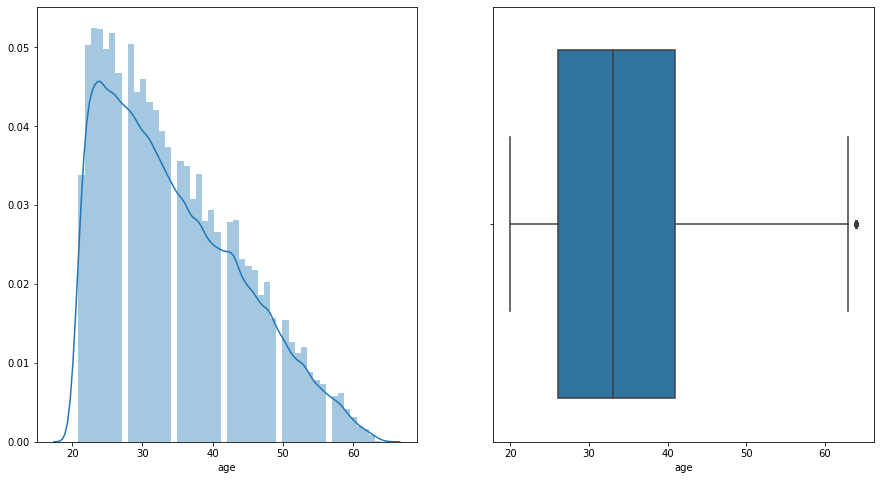

In [62]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.distplot(df['age'])

plt.subplot(1,2,2)
sns.boxplot(df['age'])

plt.show()

It is not that skewed

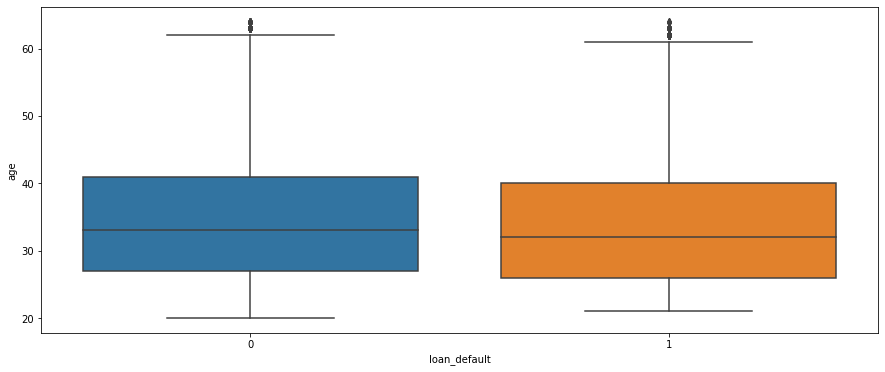

In [63]:
plt.figure(figsize=(15,6))
sns.boxplot(x ='loan_default',y='age',data=df)
plt.show()

The Age at the time of loan disbursement is almost similar among defaulters and non defaulters

### Perform CNS score / CIBIL score

In [64]:
df['perform_cns_score'].describe()

count    225493.000000
mean        293.040449
std         338.874784
min           0.000000
25%           0.000000
50%          15.000000
75%         680.000000
max         890.000000
Name: perform_cns_score, dtype: float64

In [65]:
cibil_non_default = df[df['loan_default']==0]['perform_cns_score']
cibil_default = df[df['loan_default']==1]['perform_cns_score']

In [66]:
pd.DataFrame([cibil_non_default.describe(), cibil_default.describe()], index=['non_defaulters','defaulters'])

count        mean         std  min  25%   50%    75%    max
non_defaulters  176526.0  303.700934  343.367235  0.0  0.0  15.0  692.0  890.0
defaulters       48967.0  254.609410  319.221743  0.0  0.0   0.0  611.5  879.0

Here we can observe a difference in the mean and median cibil scores among the defaulters and non defaulters.
The mean and median cibil scores are higher for non defaulters.

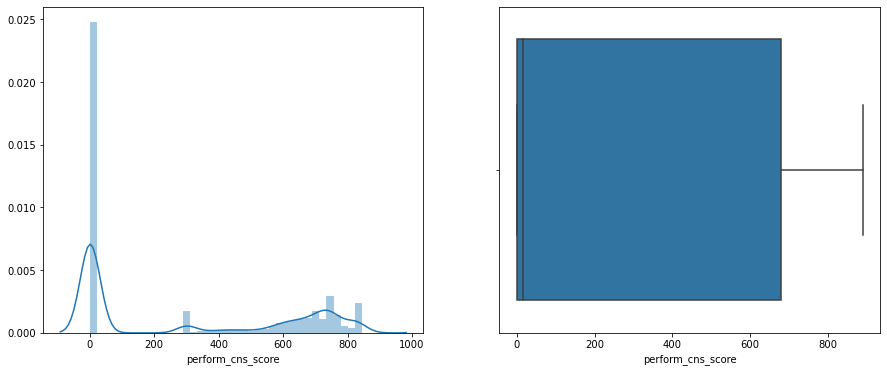

In [67]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['perform_cns_score'])

plt.subplot(1,2,2)
sns.boxplot(df['perform_cns_score'])

plt.show()

In the data, most people have a CIBIL score of 0, and 50% of cibil scores are between 0 to 700 approximately

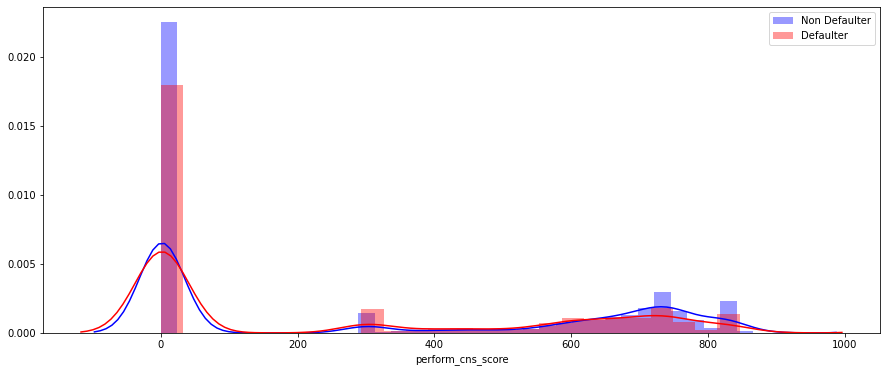

In [68]:
plt.figure(figsize=(15,6))

sns.distplot(cibil_non_default, color='blue', label = 'Non Defaulter')
sns.distplot(cibil_default, color='red', label = 'Defaulter')

plt.legend()
plt.show()

CIBIL score distribution is looking almost similar for defaulters and non defaulters

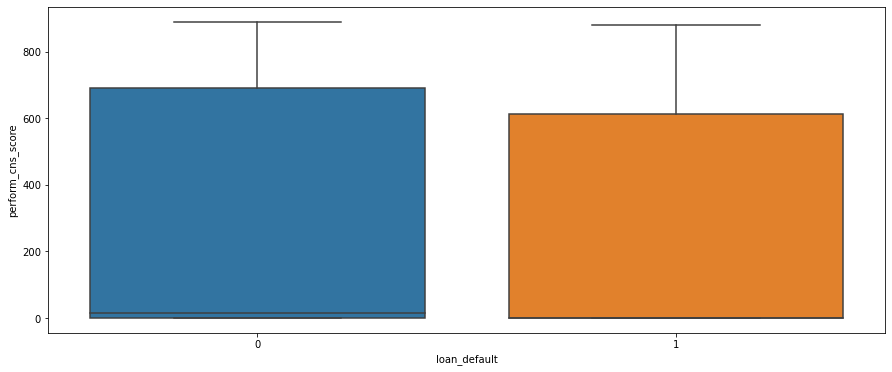

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(x ='loan_default',y='perform_cns_score',data=df)
plt.show()

We can see that the mean and median cibil scores of non defaulters is sligtly higher than that of defaulters.
Also the 75th percentile value of cibil score is higher for defaulters.
The max score is nearly same for defaulters and non defaulters

### Perform cns score description

In [70]:
df['perform_cns_score_description'].describe()

count                          225493
unique                             20
top       No Bureau History Available
freq                           111773
Name: perform_cns_score_description, dtype: object

In [71]:
df['perform_cns_score_description'].value_counts()

No Bureau History Available                                111773
C-Very Low Risk                                             15715
A-Very Low Risk                                             13790
D-Very Low Risk                                             11134
B-Very Low Risk                                              9032
M-Very High Risk                                             8632
F-Low Risk                                                   8309
K-High Risk                                                  8107
H-Medium Risk                                                6695
E-Low Risk                                                   5695
I-Medium Risk                                                5440
G-Low Risk                                                   3902
Not Scored: Sufficient History Not Available                 3671
J-High Risk                                                  3667
Not Scored: Not Enough Info available on the customer        3557
Not Scored

In [72]:
cnsd = pd.crosstab(index=df['perform_cns_score_description'], columns=df['loan_default'])
cnsd['Percent of Defaulters'] = (cnsd[1] / (cnsd[0] + cnsd[1]))*100

In [73]:
cnsd

loan_default                                            0      1  \
perform_cns_score_description                                      
A-Very Low Risk                                     11518   2272   
B-Very Low Risk                                      7854   1178   
C-Very Low Risk                                     13009   2706   
D-Very Low Risk                                      9478   1656   
E-Low Risk                                           4717    978   
F-Low Risk                                           6767   1542   
G-Low Risk                                           3125    777   
H-Medium Risk                                        5082   1613   
I-Medium Risk                                        3957   1483   
J-High Risk                                          2739    928   
K-High Risk                                          5853   2254   
L-Very High Risk                                      806    316   
M-Very High Risk                                     6009   2623   
No Bureau History Available                         85824  25949   
Not Scored: More than 50 active Accounts found          3      0   
Not Scored: No Activity seen on the customer (I...   2304    511   
Not Scored: No Updates available in last 36 months   1189    288   
Not Scored: Not Enough Info available on the cu...   2814    743   
Not Scored: Only a Guarantor                          751    206   
Not Scored: Sufficient History Not Available         2727    944   

loan_default                                        Percent of Defaulters  
perform_cns_score_description                                              
A-Very Low Risk                                                 16.475707  
B-Very Low Risk                                                 13.042516  
C-Very Low Risk                                                 17.219217  
D-Very Low Risk                                                 14.873361  
E-Low Risk                                                      17.172959  
F-Low Risk                                                      18.558190  
G-Low Risk                                                      19.912865  
H-Medium Risk                                                   24.092606  
I-Medium Risk                                                   27.261029  
J-High Risk                                                     25.306790  
K-High Risk                                                     27.803133  
L-Very High Risk                                                28.163993  
M-Very High Risk                                                30.386932  
No Bureau History Available                                     23.215803  
Not Scored: More than 50 active Accounts found                   0.000000  
Not Scored: No Activity seen on the customer (I...              18.152753  
Not Scored: No Updates available in last 36 months              19.498984  
Not Scored: Not Enough Info available on the cu...              20.888389  
Not Scored: Only a Guarantor                                    21.525601  
Not Scored: Sufficient History Not Available                    25.715064

We can see that as the risk increases, the percent of default also increases

In [74]:
# grouping all same risk into one and creating a new feature with only six classes
# e.g A-Very Low Risk to Very Low Risk
#     B-Very Low Risk to Very Low Risk

risk = []
for i in df['perform_cns_score_description']:
    if('Very Low' in i):
        risk.append('Very Low Risk')
    elif('Low' in i):
        risk.append('Low Risk')
    elif('Medium' in i):
        risk.append('Medium Risk')
    elif('Very High' in i):
        risk.append('Very High Risk')
    elif('High' in i):
        risk.append('High Risk')
    else:
        risk.append('Not Scored')


In [75]:
df['risk'] = risk

In [76]:
risk_counts = pd.Series(risk).value_counts().sort_values()
risk_counts

Very High Risk      9754
High Risk          11774
Medium Risk        12135
Low Risk           17906
Very Low Risk      49671
Not Scored        124253
dtype: int64

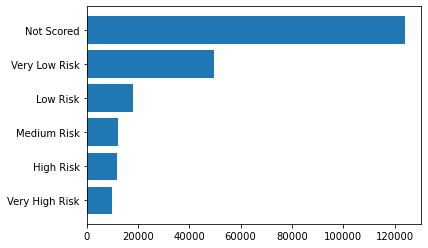

In [77]:
plt.barh(y = risk_counts.index,width=risk_counts.values)
plt.show()

In [78]:
risk_map = {'Not Scored':-1, 
            'Very Low Risk':4,
            'Low Risk':3,
            'Medium Risk':2, 
            'High Risk':1,
            'Very High Risk':0}

df['risk'] = df['risk'].map(risk_map)

In [79]:
# Dropping the score description
df.drop('perform_cns_score_description',axis=1,inplace=True)

In [80]:
risk_counts = pd.crosstab(index=df['risk'], columns=df['loan_default'])
risk_counts['Percent of Defaluters'] = (risk_counts[1] / (risk_counts[0] + risk_counts[1]))*100
risk_counts.sort_values(by='Percent of Defaluters', ascending=False)

loan_default      0      1  Percent of Defaluters
risk                                             
 0             6815   2939              30.131228
 1             8592   3182              27.025650
 2             9039   3096              25.512979
-1            95612  28641              23.050550
 3            14609   3297              18.412823
 4            41859   7812              15.727487

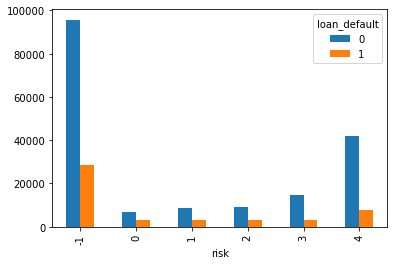

In [81]:
pd.crosstab(index=df['risk'], columns=df['loan_default']).plot(kind='bar')
plt.show()

### Average Account Age and Credit History Length

In [82]:
# We have 2 Columns named "AVERAGE_ACCT_AGE" & "CREDIT_HISTORY_LENGTH".
# They have AplhaNumeric Values,changing them to Months

def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [83]:
df['credit_history_length'] = df['credit_history_length'].apply(duration)
df['average_acct_age'] = df['average_acct_age'].apply(duration)

In [84]:
df['average_acct_age'].describe()

count    225493.000000
mean          9.028302
std          15.161620
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: average_acct_age, dtype: float64

In [85]:
acct_age_non_defaulters = df[df['loan_default'] == 0]['average_acct_age']
acct_age_defaulters = df[df['loan_default'] == 1]['average_acct_age']

In [86]:
pd.DataFrame([acct_age_non_defaulters.describe(), acct_age_defaulters.describe()], index=['non_defaulters','defaulters'])

count      mean        std  min  25%  50%   75%    max
non_defaulters  176526.0  9.236073  15.321127  0.0  0.0  1.0  13.0  369.0
defaulters       48967.0  8.279290  14.547651  0.0  0.0  0.0  12.0  188.0

The maximum average account age is higher for non defaulters

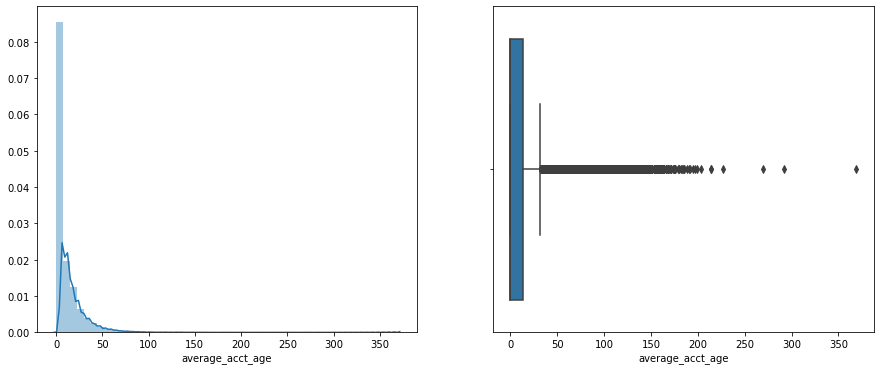

In [87]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['average_acct_age'])

plt.subplot(1,2,2)
sns.boxplot(df['average_acct_age'])

plt.show()

It is highly right skewed

In [88]:
df['credit_history_length'].describe()

count    225493.000000
mean         16.453087
std          28.676869
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: credit_history_length, dtype: float64

In [89]:
credit_non_default = df[df['loan_default'] == 0]['credit_history_length']
credit_default = df[df['loan_default'] == 1]['credit_history_length']

In [90]:
pd.DataFrame([credit_non_default.describe(), credit_default.describe()], index=['non_defaulters','defaulters'])

count       mean        std  min  25%  50%   75%    max
non_defaulters  176526.0  17.107848  29.456617  0.0  0.0  1.0  24.0  449.0
defaulters       48967.0  14.092675  25.531302  0.0  0.0  0.0  21.0  468.0

The mean,std and max credit history length is slightly higher for non defaulters 

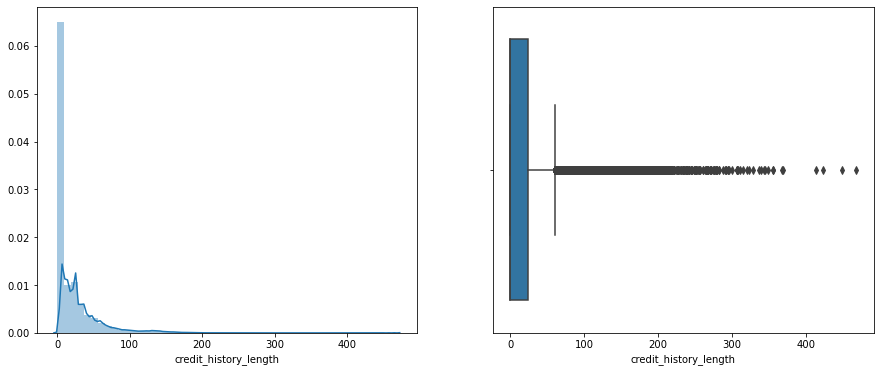

In [91]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.distplot(df['credit_history_length'])

plt.subplot(1,2,2)
sns.boxplot(df['credit_history_length'])

plt.show()

Highly right skewed

### New accounts in last six months

In [92]:
counts = df['new_accts_in_last_six_months'].value_counts()
percent = df['new_accts_in_last_six_months'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0   174944        77.582896
1    31361        13.907749
2    10806         4.792166
3     4375         1.940193
4     1918         0.850581
5      947         0.419969
6      473         0.209763
7      293         0.129938
8      143         0.063417
9       78         0.034591
10      54         0.023948
11      30         0.013304
12      20         0.008869
13      15         0.006652
14      11         0.004878
16       6         0.002661
17       5         0.002217
15       2         0.000887
18       2         0.000887
19       2         0.000887
20       2         0.000887
23       2         0.000887
28       1         0.000443
21       1         0.000443
22       1         0.000443
35       1         0.000443

Most of them have not opened any new account in the last 6 months

In [93]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'aadhar_flag', 'voterid_flag',
       'perform_cns_score', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'self_employed', 'age', 'risk'],
      dtype='object')

### Delinquent Accounts in last six months

In [94]:
counts = df['delinquent_accts_in_last_six_months'].value_counts()
percent = df['delinquent_accts_in_last_six_months'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0   207647        92.085785
1    14680         6.510180
2     2405         1.066552
3      519         0.230162
4      136         0.060312
5       56         0.024834
6       20         0.008869
7       12         0.005322
8        7         0.003104
12       3         0.001330
11       3         0.001330
10       2         0.000887
9        2         0.000887
20       1         0.000443

We can see that 92% of customers have not defaulted loans in last six months.
8% of customers have deafulted loans for >= 1 time

### No of Inquiries

In [95]:
counts = df['no_of_inquiries'].value_counts()
percent = df['no_of_inquiries'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0   194990        86.472751
1    21794         9.665045
2     5294         2.347745
3     1724         0.764547
4      745         0.330387
5      331         0.146789
6      234         0.103773
7      133         0.058982
8      103         0.045678
9       41         0.018182
10      33         0.014635
11      15         0.006652
12      14         0.006209
14       8         0.003548
15       7         0.003104
19       6         0.002661
13       5         0.002217
17       4         0.001774
18       4         0.001774
16       3         0.001330
28       1         0.000443
20       1         0.000443
22       1         0.000443
23       1         0.000443
36       1         0.000443

Most of the customers have not made any enquiries regarding loans

In [96]:
no_inquiries = pd.crosstab(index=df['no_of_inquiries'], columns=df['loan_default'])
no_inquiries['pct_default'] = (no_inquiries[1]/no_inquiries.sum(axis=1))*100
no_inquiries


loan_default          0      1  pct_default
no_of_inquiries                            
0                153885  41105    21.080568
1                 16487   5307    24.350739
2                  3838   1456    27.502833
3                  1220    504    29.234339
4                   514    231    31.006711
5                   204    127    38.368580
6                   144     90    38.461538
7                    78     55    41.353383
8                    60     43    41.747573
9                    27     14    34.146341
10                   22     11    33.333333
11                    8      7    46.666667
12                   10      4    28.571429
13                    2      3    60.000000
14                    6      2    25.000000
15                    3      4    57.142857
16                    3      0     0.000000
17                    4      0     0.000000
18                    2      2    50.000000
19                    4      2    33.333333
20                    1      0     0.000000
22                    1      0     0.000000
23                    1      0     0.000000
28                    1      0     0.000000
36                    1      0     0.000000

Here, except for few cases, as the number of enquires increase, there is an increase in the pct of default.


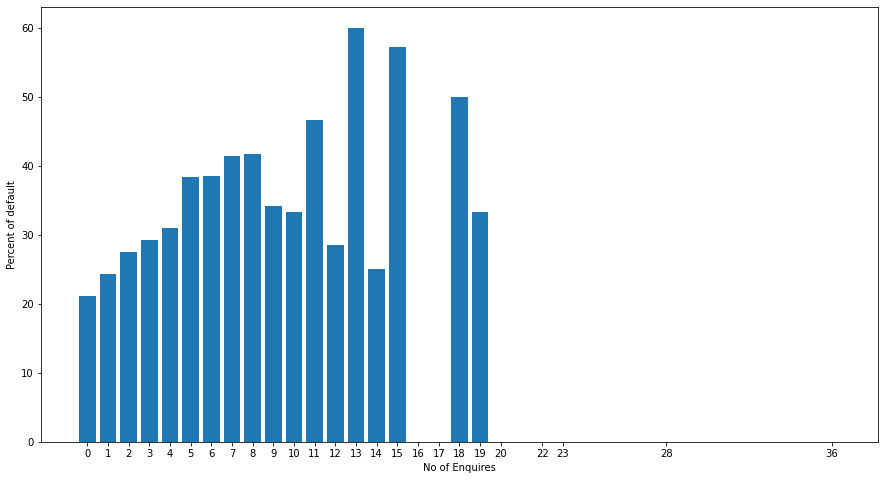

In [97]:
plt.figure(figsize=(15,8))
plt.bar(no_inquiries.index,no_inquiries['pct_default'])
plt.xticks(no_inquiries.index)
plt.xlabel('No of Enquires')
plt.ylabel('Percent of default')
plt.show()

#### Feature importances of different numerical features

In [98]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'aadhar_flag', 'voterid_flag',
       'perform_cns_score', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'self_employed', 'age', 'risk'],
      dtype='object')

In [99]:
df2 = df[['disbursed_amount','asset_cost', 'ltv','perform_cns_score', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'age', 'risk']]

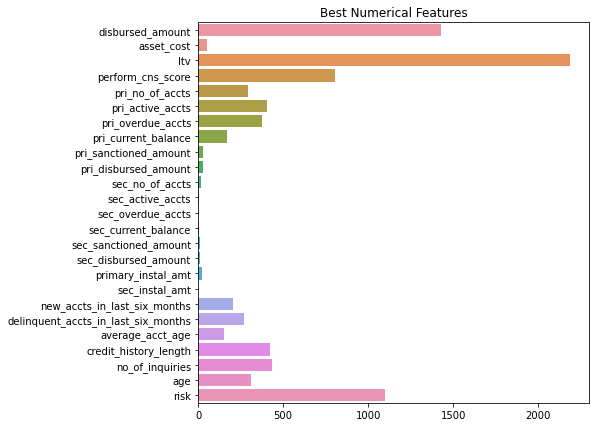

In [100]:
# Feature importances using SelectKBest algorithm using ANOVA F-value between label/feature
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif)
numcols=n.fit(df2,df['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=df2.columns)
plt.title('Best Numerical Features')
plt.show()

In [101]:
# Feature importance using Extra Trees classifier
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df2,df['loan_default'])

ExtraTreesClassifier()

In [102]:
pd.DataFrame(model.feature_importances_,index=df2.columns,columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False)

Feature_Importances
ltv                                             0.194669
asset_cost                                      0.191438
disbursed_amount                                0.182680
age                                             0.098158
credit_history_length                           0.034984
average_acct_age                                0.033786
primary_instal_amt                              0.033035
perform_cns_score                               0.031356
pri_current_balance                             0.029207
pri_disbursed_amount                            0.028732
pri_sanctioned_amount                           0.028715
pri_no_of_accts                                 0.025730
no_of_inquiries                                 0.019079
pri_active_accts                                0.017478
new_accts_in_last_six_months                    0.013133
risk                                            0.008681
pri_overdue_accts                               0.008660
delinquent_accts_in_last_six_months             0.008649
sec_no_of_accts                                 0.003150
sec_instal_amt                                  0.001711
sec_active_accts                                0.001525
sec_sanctioned_amount                           0.001515
sec_disbursed_amount                            0.001475
sec_current_balance                             0.001430
sec_overdue_accts                               0.001021

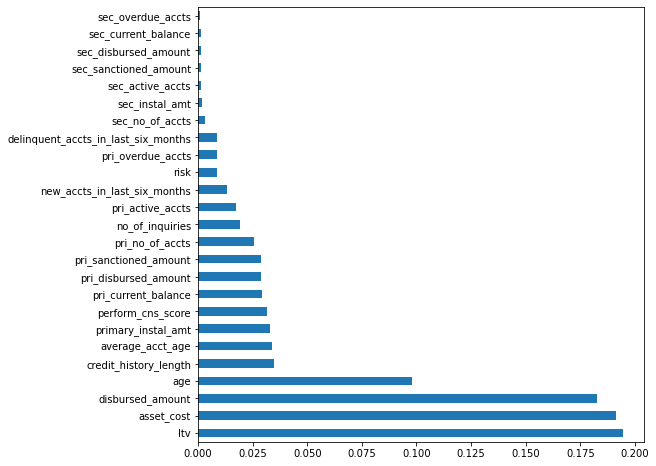

In [103]:
plt.figure(figsize=(8,8))
ranked_features=pd.Series(model.feature_importances_,index=df2.columns)
ranked_features.nlargest(25).plot(kind='barh')
plt.show()

We cannot drop the secondary account details as they are asked by the institutions before granting loan.

### Primary and Secondary Accounts

In [104]:
# Combining the Primary and Secondary Accounts

df['no_of_accts'] = df['pri_no_of_accts'] + df['sec_no_of_accts']
df['active_accts'] = df['pri_active_accts'] + df['sec_active_accts']
df['overdue_accts'] = df['pri_overdue_accts'] + df['sec_overdue_accts']
df['outstanding_amount'] = df['pri_current_balance'] + df['sec_current_balance']
df['sanctioned_amount'] = df['pri_sanctioned_amount'] + df['sec_sanctioned_amount']
df['psdisbursed_amount'] = df['pri_disbursed_amount'] + df['sec_disbursed_amount']
df['install_amt'] = df['primary_instal_amt'] + df['sec_instal_amt']

In [105]:
df.drop(['pri_no_of_accts','sec_no_of_accts','pri_active_accts','sec_active_accts',
        'pri_overdue_accts','sec_overdue_accts','pri_current_balance','sec_current_balance',
        'pri_sanctioned_amount','sec_sanctioned_amount','pri_disbursed_amount','sec_disbursed_amount',
        'primary_instal_amt','sec_instal_amt'],axis=1,inplace=True)

In [106]:
# Account and amount description

df[['no_of_accts','active_accts','overdue_accts','outstanding_amount','sanctioned_amount','psdisbursed_amount','install_amt']].describe()

no_of_accts   active_accts  overdue_accts  outstanding_amount  \
count  225493.000000  225493.000000  225493.000000        2.254930e+05   
mean        2.522482       1.081980       0.166351        1.740510e+05   
std         5.297041       1.995252       0.569216        9.705526e+05   
min         0.000000       0.000000       0.000000       -6.678296e+06   
25%         0.000000       0.000000       0.000000        0.000000e+00   
50%         1.000000       0.000000       0.000000        0.000000e+00   
75%         3.000000       1.000000       0.000000        3.870600e+04   
max       453.000000     144.000000      25.000000        9.652492e+07   

       sanctioned_amount  psdisbursed_amount   install_amt  
count       2.254930e+05        2.254930e+05  2.254930e+05  
mean        2.295628e+05        2.289809e+05  1.331814e+04  
std         2.421078e+06        2.423976e+06  1.507104e+05  
min         0.000000e+00        0.000000e+00  0.000000e+00  
25%         0.000000e+00        0.000000e+00  0.000000e+00  
50%         0.000000e+00        0.000000e+00  0.000000e+00  
75%         6.800000e+04        6.600000e+04  2.127000e+03  
max         1.000000e+09        1.000000e+09  2.564281e+07

### Total number of accounts

In [107]:
df['no_of_accts'].describe()

count    225493.000000
mean          2.522482
std           5.297041
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         453.000000
Name: no_of_accts, dtype: float64

In [108]:
df['no_of_accts'].value_counts()

0      110657
1       34019
2       19400
3       12938
4        9290
        ...  
147         1
453         1
194         1
120         1
124         1
Name: no_of_accts, Length: 107, dtype: int64

In [109]:
na_non_default = df[df['loan_default']==0]['no_of_accts']
na_default = df[df['loan_default']==1]['no_of_accts']

In [110]:
pd.DataFrame([na_non_default.describe(), na_default.describe()], index=['non_defaulters','defaulters'])

count      mean       std  min  25%  50%  75%    max
non_defaulters  176526.0  2.624220  5.343009  0.0  0.0  1.0  3.0  354.0
defaulters       48967.0  2.155717  5.111176  0.0  0.0  0.0  2.0  453.0

### Active Accounts

In [111]:
counts = df['active_accts'].value_counts()
percent = df['active_accts'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0    130135        57.711326
1     41185        18.264425
2     21359         9.472134
3     12203         5.411698
4      7506         3.328706
5      4578         2.030218
6      2836         1.257689
7      1853         0.821755
8      1204         0.533941
9       795         0.352561
10      542         0.240362
11      366         0.162311
12      235         0.104216
13      192         0.085147
14      130         0.057651
15      100         0.044347
16       57         0.025278
17       57         0.025278
18       32         0.014191
19       28         0.012417
21       13         0.005765
20       13         0.005765
23       12         0.005322
24       10         0.004435
22        9         0.003991
26        7         0.003104
25        7         0.003104
28        6         0.002661
31        4         0.001774
27        3         0.001330
34        3         0.001330
32        2         0.000887
35        2         0.000887
37        2         0.000887
39        1         0.000443
43        1         0.000443
42        1         0.000443
52        1         0.000443
36        1         0.000443
144       1         0.000443
65        1         0.000443

There are over 50 percent inactive accounts. Around 18 percent -> 1 active account present


### Overdue Accounts

In [112]:
counts = df['overdue_accts'].value_counts()
percent = df['overdue_accts'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0   198756        88.142869
1    20167         8.943515
2     4429         1.964141
3     1273         0.564541
4      438         0.194241
5      179         0.079382
6      107         0.047452
7       42         0.018626
8       29         0.012861
9       25         0.011087
11      11         0.004878
12      10         0.004435
10       7         0.003104
13       6         0.002661
14       5         0.002217
17       2         0.000887
18       2         0.000887
23       1         0.000443
15       1         0.000443
16       1         0.000443
19       1         0.000443
25       1         0.000443

Most of the accounts are not overdue. Around 9 percent of data contain 1 overdue account, and around 2 percent of data
contain 2 overdue accounts

In [113]:
no_inquiries = pd.crosstab(index=df['overdue_accts'], columns=df['loan_default'])
no_inquiries['pct_default'] = (no_inquiries[1]/no_inquiries.sum(axis=1))*100
no_inquiries

loan_default        0      1  pct_default
overdue_accts                            
0              157027  41729    20.995089
1               14797   5370    26.627659
2                3176   1253    28.290811
3                 895    378    29.693637
4                 310    128    29.223744
5                 124     55    30.726257
6                  83     24    22.429907
7                  35      7    16.666667
8                  22      7    24.137931
9                  21      4    16.000000
10                  6      1    14.285714
11                  9      2    18.181818
12                  6      4    40.000000
13                  4      2    33.333333
14                  4      1    20.000000
15                  1      0     0.000000
16                  0      1   100.000000
17                  2      0     0.000000
18                  1      1    50.000000
19                  1      0     0.000000
23                  1      0     0.000000
25                  1      0     0.000000

Upto 5 overdue accounts, we can see that as the number of overdue accounts increase, the percentage of default also increase.
However we do not observe the same pattern/any pattern beyond 5 overdue accounts

### Outstanding Amount

In [114]:
counts = df['outstanding_amount'].value_counts()
percent = df['outstanding_amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0       134776        59.769483
400        121         0.053660
800        120         0.053217
30000      100         0.044347
100000      79         0.035034
...        ...              ...
171164       1         0.000443
173211       1         0.000443
177305       1         0.000443
142474       1         0.000443
42795        1         0.000443

[71171 rows x 2 columns]

Around 60 percent of data do not have any outstanding amount

### Sanctioned Amount

In [115]:
counts = df['sanctioned_amount'].value_counts()
percent = df['sanctioned_amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0        131200        58.183624
50000      1462         0.648357
30000      1405         0.623079
100000      946         0.419525
25000       937         0.415534
...         ...              ...
182803        1         0.000443
184848        1         0.000443
141839        1         0.000443
9568778       1         0.000443
268085        1         0.000443

[44706 rows x 2 columns]

For around 58 percent of the accounts, no amount was sanctioned for all the loans at the time of disbursement

### Psdisbursed Amount

In [116]:
counts = df['psdisbursed_amount'].value_counts()
percent = df['psdisbursed_amount'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0        131306        58.230632
50000      1361         0.603566
30000      1301         0.576958
100000      917         0.406665
40000       765         0.339257
...         ...              ...
1732487       1         0.000443
112508        1         0.000443
9543545       1         0.000443
6150000       1         0.000443
3979177       1         0.000443

[48245 rows x 2 columns]

For 58 percent of all accounts, no amount was disbursed for all the loans at the time of disbursement

### Instalment Amount

In [117]:
counts = df['install_amt'].value_counts()
percent = df['install_amt'].value_counts(normalize=True)*100

pd.DataFrame({'counts':counts,'percent_of_data':percent})

counts  percent_of_data
0       152606        67.676602
1620       287         0.127277
1500       153         0.067851
1600       140         0.062086
2000       139         0.061643
...        ...              ...
491716       1         0.000443
331899       1         0.000443
16572        1         0.000443
26809        1         0.000443
36150        1         0.000443

[28074 rows x 2 columns]

Around 68 percent of data do not have any installment amount to pay

In [118]:
df.head()

disbursed_amount  asset_cost    ltv  aadhar_flag  voterid_flag  \
0             50578       58400  89.55            1             0   
1             47145       65550  73.23            1             0   
2             53278       61360  89.63            1             0   
3             57513       66113  88.48            1             0   
4             52378       60300  88.39            1             0   

   perform_cns_score  new_accts_in_last_six_months  \
0                  0                             0   
1                598                             0   
2                  0                             0   
3                305                             0   
4                  0                             0   

   delinquent_accts_in_last_six_months  average_acct_age  \
0                                    0                 0   
1                                    1                23   
2                                    0                 0   
3                                    0                 8   
4                                    0                 0   

   credit_history_length  ...  self_employed  age  risk  no_of_accts  \
0                      0  ...              0   34    -1            0   
1                     23  ...              1   33     2            1   
2                      0  ...              1   33    -1            0   
3                     15  ...              1   25     0            3   
4                      0  ...              1   41    -1            0   

   active_accts  overdue_accts  outstanding_amount  sanctioned_amount  \
0             0              0                   0                  0   
1             1              1               27600              50200   
2             0              0                   0                  0   
3             0              0                   0                  0   
4             0              0                   0                  0   

   psdisbursed_amount  install_amt  
0                   0            0  
1               50200         1991  
2                   0            0  
3                   0           31  
4                   0            0  

[5 rows x 22 columns]

In [119]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'aadhar_flag', 'voterid_flag',
       'perform_cns_score', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries', 'loan_default',
       'self_employed', 'age', 'risk', 'no_of_accts', 'active_accts',
       'overdue_accts', 'outstanding_amount', 'sanctioned_amount',
       'psdisbursed_amount', 'install_amt'],
      dtype='object')

In [120]:
df3 = df[['disbursed_amount', 'asset_cost', 'ltv','perform_cns_score', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries',
       'age', 'risk', 'no_of_accts', 'active_accts',
       'overdue_accts', 'outstanding_amount', 'sanctioned_amount',
       'psdisbursed_amount', 'install_amt']]

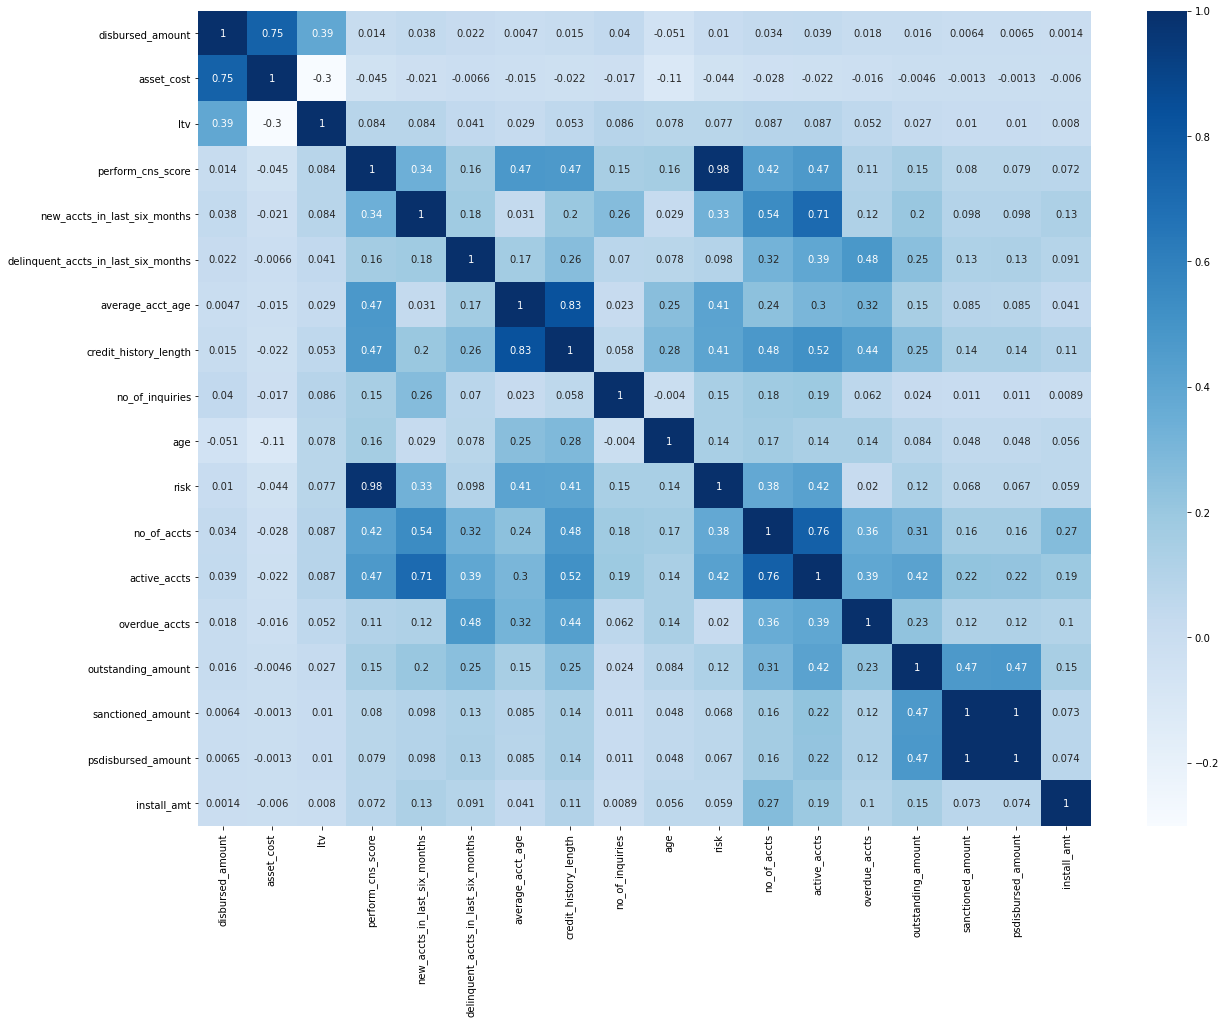

In [121]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(),annot=True,cmap='Blues')
plt.show()

#### Feature importances of above numerical features

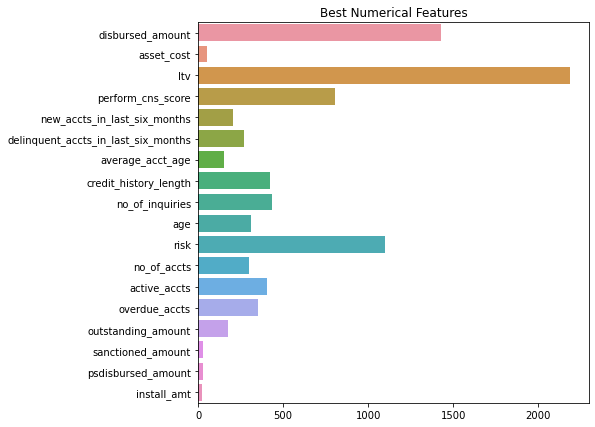

In [122]:
# Feature importance using SelectKBest algorithm using ANOVA F-value between label/feature
from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif)
numcols=n.fit(df3,df['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=df3.columns)
plt.title('Best Numerical Features')
plt.show()

In [123]:
# Feature importance using Extra Trees classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(df3,df['loan_default'])

ExtraTreesClassifier()

In [124]:
pd.DataFrame(model.feature_importances_,index=df3.columns,columns=['Feature_Importances']).sort_values(by='Feature_Importances',ascending=False)

Feature_Importances
ltv                                             0.193711
asset_cost                                      0.190868
disbursed_amount                                0.182235
age                                             0.102457
credit_history_length                           0.035722
average_acct_age                                0.034659
install_amt                                     0.033857
perform_cns_score                               0.032340
outstanding_amount                              0.030031
sanctioned_amount                               0.029425
psdisbursed_amount                              0.029281
no_of_accts                                     0.026895
no_of_inquiries                                 0.019646
active_accts                                    0.018450
new_accts_in_last_six_months                    0.013804
overdue_accts                                   0.009149
delinquent_accts_in_last_six_months             0.008907
risk                                            0.008562

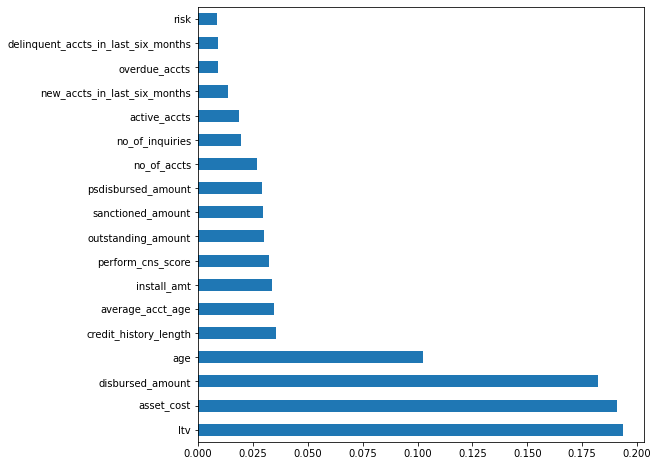

In [125]:
plt.figure(figsize=(8,8))
ranked_features=pd.Series(model.feature_importances_,index=df3.columns)
ranked_features.nlargest(18).plot(kind='barh')
plt.show()

In [126]:
# Based on the correlation between the features and the feature importances, we are dropping few features

df4 = df.copy()

In [127]:
df.drop(['perform_cns_score','average_acct_age','no_of_accts','psdisbursed_amount'],axis=1,inplace=True)

In [128]:
df.head()

disbursed_amount  asset_cost    ltv  aadhar_flag  voterid_flag  \
0             50578       58400  89.55            1             0   
1             47145       65550  73.23            1             0   
2             53278       61360  89.63            1             0   
3             57513       66113  88.48            1             0   
4             52378       60300  88.39            1             0   

   new_accts_in_last_six_months  delinquent_accts_in_last_six_months  \
0                             0                                    0   
1                             0                                    1   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   credit_history_length  no_of_inquiries  loan_default  self_employed  age  \
0                      0                0             0              0   34   
1                     23                0             1              1   33   
2                      0                0             0              1   33   
3                     15                1             1              1   25   
4                      0                1             1              1   41   

   risk  active_accts  overdue_accts  outstanding_amount  sanctioned_amount  \
0    -1             0              0                   0                  0   
1     2             1              1               27600              50200   
2    -1             0              0                   0                  0   
3     0             0              0                   0                  0   
4    -1             0              0                   0                  0   

   install_amt  
0            0  
1         1991  
2            0  
3           31  
4            0

In [129]:
df.shape

(225493, 18)

In [130]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'aadhar_flag', 'voterid_flag',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'credit_history_length', 'no_of_inquiries', 'loan_default',
       'self_employed', 'age', 'risk', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt'],
      dtype='object')

## Checking and Handling outliers

In [131]:
df12 = df[['disbursed_amount', 'asset_cost', 'ltv',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'credit_history_length', 'no_of_inquiries',
       'age', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt']]

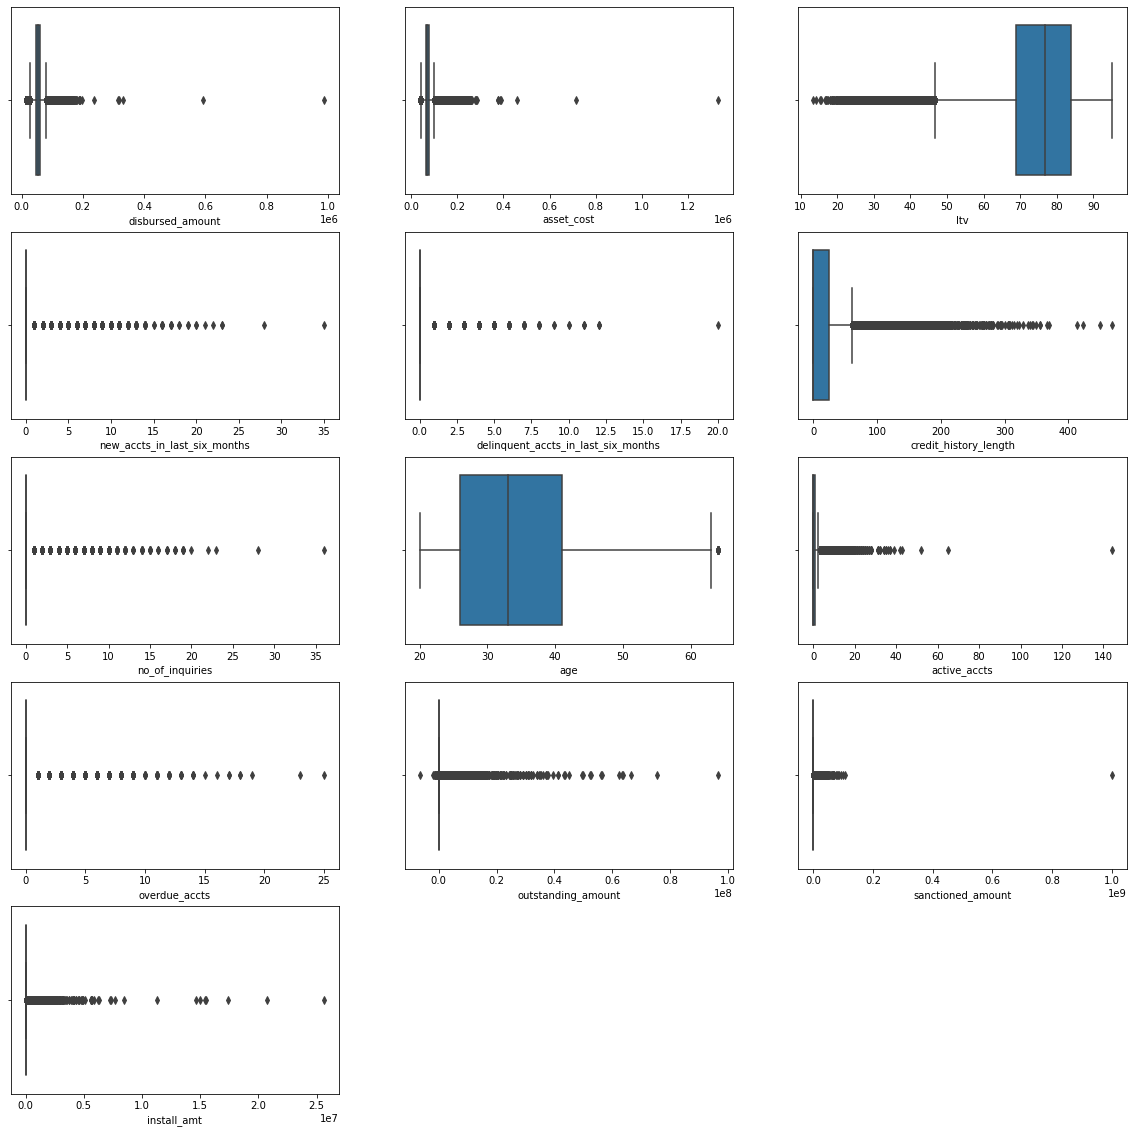

In [132]:
plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=13:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()
    

Most of the features are highly right skewed. 

In [133]:
df.shape

(225493, 18)

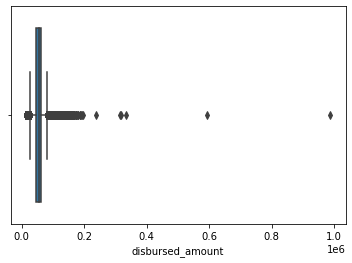

In [134]:
sns.boxplot(df['disbursed_amount'])

In [135]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['disbursed_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 13320
10 percentile value is 39641
20 percentile value is 45150
30 percentile value is 48518
40 percentile value is 51303
50 percentile value is 53703
60 percentile value is 56040
70 percentile value is 58693
80 percentile value is 62213
90 percentile value is 68817
100 percentile value is  987354


In [136]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['disbursed_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 68817
91 percentile value is 69817
92 percentile value is 70817
93 percentile value is 71817
94 percentile value is 72817
95 percentile value is 73817
96 percentile value is 76751
97 percentile value is 80386
98 percentile value is 85120
99 percentile value is 95311
100 percentile value is  987354


In [137]:
df = df[df['disbursed_amount']<max(df['disbursed_amount'])]

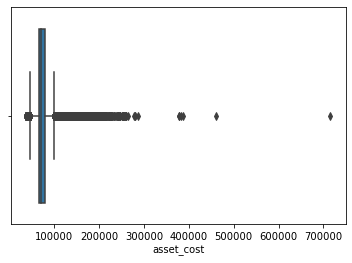

In [138]:
sns.boxplot(df['asset_cost'])

In [139]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['asset_cost'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 37000
10 percentile value is 61270
20 percentile value is 64411
30 percentile value is 66660
40 percentile value is 68657
50 percentile value is 70807
60 percentile value is 73383
70 percentile value is 76631
80 percentile value is 82711
90 percentile value is 98599
100 percentile value is  715186


In [140]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['asset_cost'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 98599
91 percentile value is 100270
92 percentile value is 102100
93 percentile value is 104200
94 percentile value is 106362
95 percentile value is 109031
96 percentile value is 112593
97 percentile value is 118079
98 percentile value is 130000
99 percentile value is 155916
100 percentile value is  715186


In [141]:
df = df[df['asset_cost']<max(df['asset_cost'])]

In [142]:
df = df[df['new_accts_in_last_six_months']<25]
df = df[df['delinquent_accts_in_last_six_months']<17.5]
df = df[df['credit_history_length']<400]
df = df[df['no_of_inquiries']<25]
df = df[df['active_accts']<50]
df = df[df['sanctioned_amount']<max(df['sanctioned_amount'])]

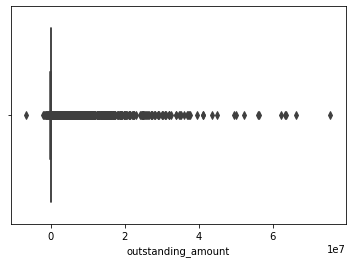

In [143]:
sns.boxplot(df['outstanding_amount'])

In [144]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['outstanding_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -6678296
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 19134
80 percentile value is 68825
90 percentile value is 325638
100 percentile value is  75603400


In [145]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['outstanding_amount'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 325638
91 percentile value is 389509
92 percentile value is 462881
93 percentile value is 553036
94 percentile value is 680707
95 percentile value is 848088
96 percentile value is 1071154
97 percentile value is 1411215
98 percentile value is 1929053
99 percentile value is 3011859
100 percentile value is  75603400


In [146]:
df = df[(df['outstanding_amount']>-6678296) & (df['outstanding_amount']<75603400)]

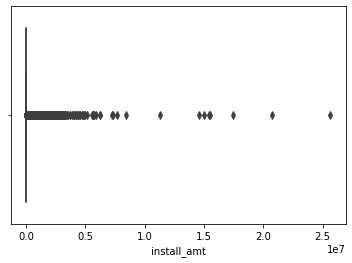

In [147]:
sns.boxplot(df['install_amt'])

In [148]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var = df['install_amt'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 1300
80 percentile value is 3565
90 percentile value is 11939
100 percentile value is  25642806


In [149]:
#looking further from the 99th percecntile
for i in range(90,100):
    var = df['install_amt'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 11939
91 percentile value is 13602
92 percentile value is 15705
93 percentile value is 18343
94 percentile value is 21950
95 percentile value is 27295
96 percentile value is 36476
97 percentile value is 56995
98 percentile value is 109167
99 percentile value is 260614
100 percentile value is  25642806


In [150]:
df = df[df['install_amt']<10000000]

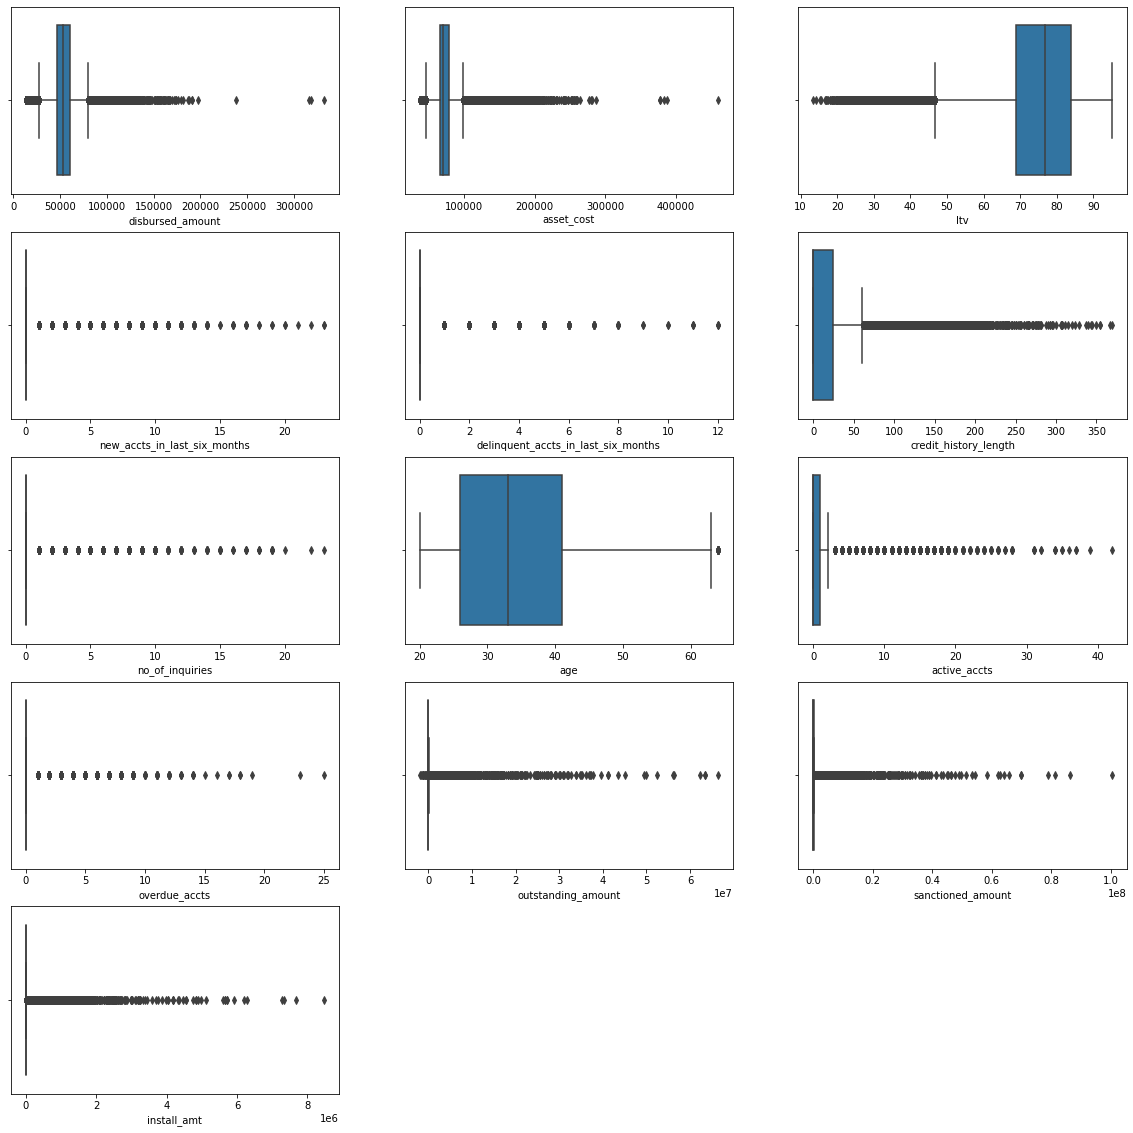

In [151]:
# Checking the distributions again

plt.figure(figsize=(20,20))
x = 1
for column in df12.columns:
    if x<=13:
        plt.subplot(5,3,x)
        sns.boxplot(df[column])
    x+=1
plt.show()

In [152]:
# Removing few more outliers/extreme values

df = df[df['disbursed_amount']<250000]
df = df[df['asset_cost']<300000]
df = df[df['outstanding_amount']<40000000]
df = df[df['sanctioned_amount']<0.800000e+08]
df = df[df['install_amt']<=5.000000e+06]

In [153]:
# We have removed the extreme values
df.shape

(225437, 18)

In [154]:
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'aadhar_flag', 'voterid_flag',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'credit_history_length', 'no_of_inquiries', 'loan_default',
       'self_employed', 'age', 'risk', 'active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt'],
      dtype='object')

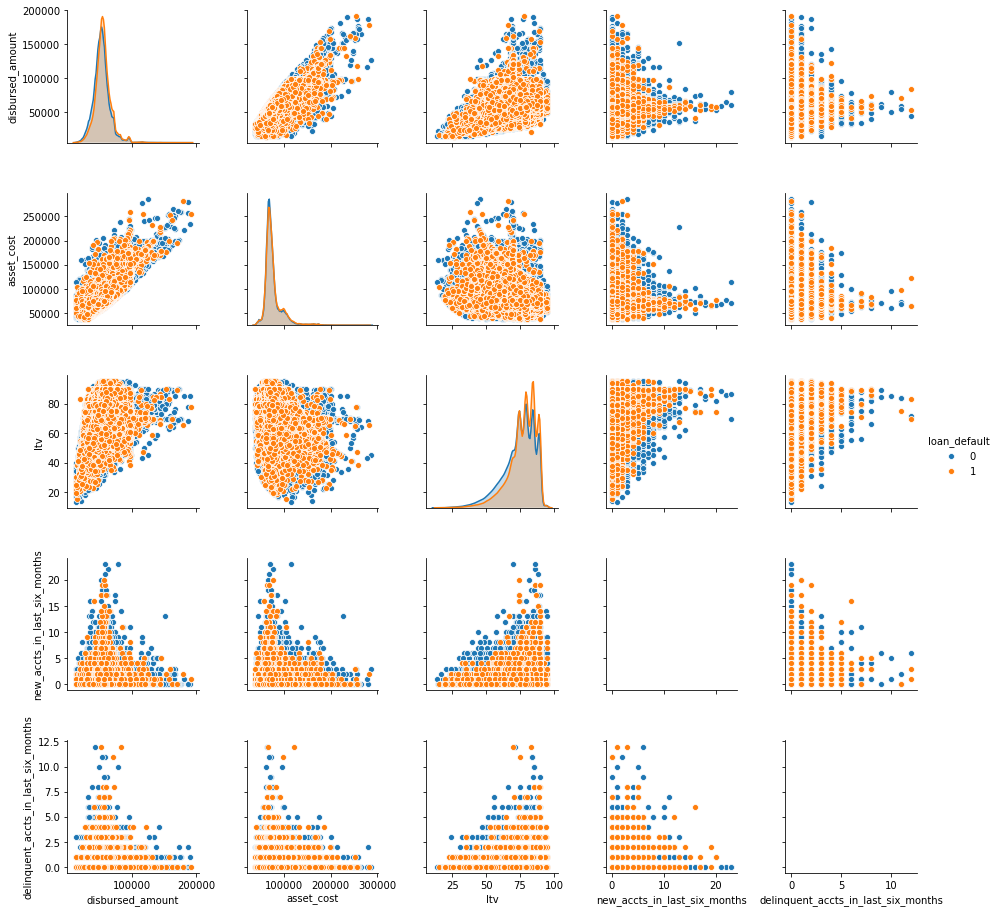

In [155]:
n = df.shape[0]
sns.pairplot(df[['disbursed_amount', 'asset_cost', 'ltv','new_accts_in_last_six_months', 
                 'delinquent_accts_in_last_six_months','loan_default']][0:n], hue='loan_default', 
             vars=['disbursed_amount', 'asset_cost', 'ltv','new_accts_in_last_six_months', 
                 'delinquent_accts_in_last_six_months'])
plt.show()

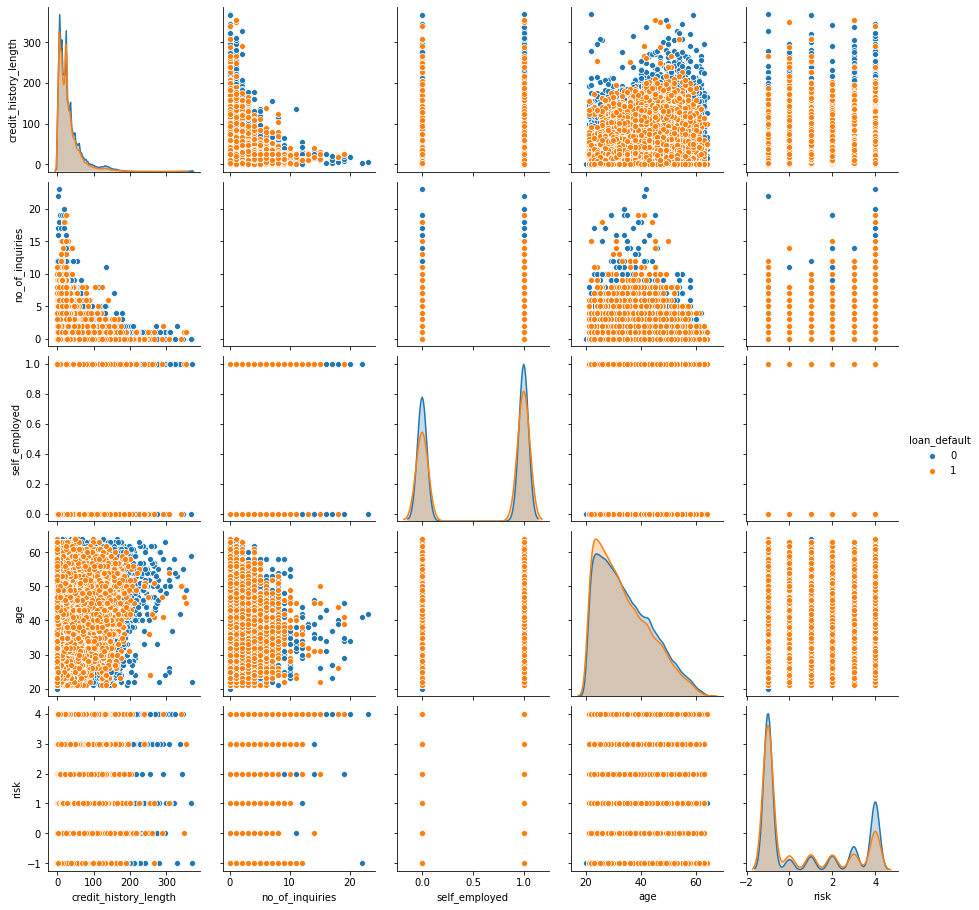

In [156]:
n = df.shape[0]
sns.pairplot(df[['credit_history_length', 'no_of_inquiries',
       'self_employed', 'age', 'risk','loan_default']][0:n], hue='loan_default', 
             vars=['credit_history_length', 'no_of_inquiries',
       'self_employed', 'age', 'risk'])
plt.show()

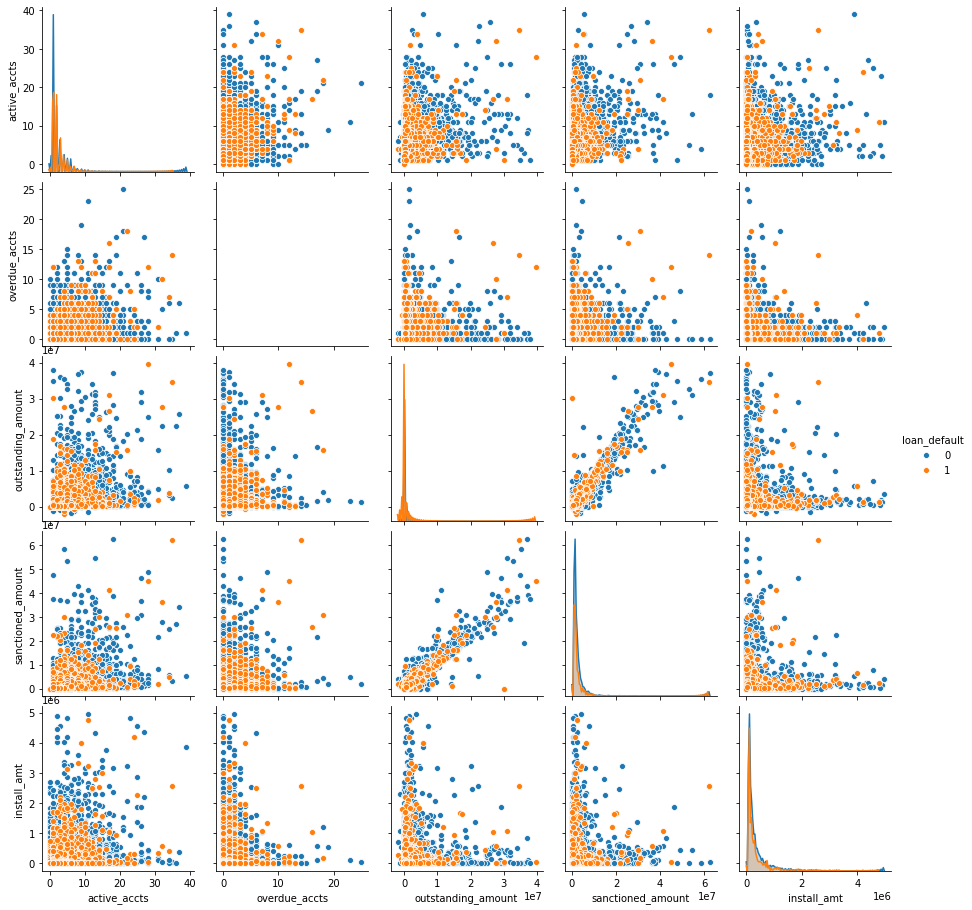

In [157]:
n = df.shape[0]
sns.pairplot(df[['active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt','loan_default']][0:n], hue='loan_default', 
             vars=['active_accts', 'overdue_accts',
       'outstanding_amount', 'sanctioned_amount', 'install_amt'])
plt.show()

## Modelling

### Logistic Regression

In [158]:
y = df['loan_default']
X = df.drop('loan_default',axis=1)

In [159]:
y = list(y)

In [160]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xscaled = sc.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled,columns=X.columns)

In [161]:
import statsmodels.api as sm
Xc = sm.add_constant(Xscaled)
model = sm.Logit(y, Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.507404
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               225437
Model:                          Logit   Df Residuals:                   225419
Method:                           MLE   Df Model:                           17
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                 0.03039
Time:                        20:03:36   Log-Likelihood:            -1.1439e+05
converged:                       True   LL-Null:                   -1.1797e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3416      0.005   -249.110      0.000      -1.352      -1.331
disbursed_amount                       -0.0764      0.029     -2.633      0.008      -0.133      -0.020
asset_cost                              0.1905      0.028      6.697      0.000       0.135       0.246
ltv                                     0.4001      0.021     19.061      0.000       0.359       0.441
aadhar_flag                            -0.0507      0.010     -4.916      0.000      -0.071      -0.030
voterid_flag                            0.0652      0.010      6.368      0.000       0.045       0.085
new_accts_in_last_six_months           -0.0158      0.009     -1.760      0.078      -0.033       0.002
delinquent_accts_in_last_six_months     0.1056      0.006     17.750      0.000       0.094       0.117
credit_history_length                  -0.0657      0.008     -8.419      0.000      -0.081      -0.050
no_of_inquiries                         0.1063      0.005     21.462      0.000       0.097       0.116
self_employed                           0.0902      0.005     16.946      0.000       0.080       0.101
age                                    -0.0830      0.006    -14.921      0.000      -0.094      -0.072
risk                                   -0.1171      0.007    -17.978      0.000      -0.130      -0.104
active_accts                           -0.1133      0.012     -9.421      0.000      -0.137      -0.090
overdue_accts                           0.1318      0.007     20.139      0.000       0.119       0.145
outstanding_amount                      0.0518      0.023      2.237      0.025       0.006       0.097
sanctioned_amount                      -0.1658      0.026     -6.444      0.000      -0.216      -0.115
install_amt                            -0.0066      0.007     -1.008      0.313      -0.019       0.006
=======================================================================================================
"""

In [162]:
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss,roc_curve,accuracy_score

In [163]:
y_pred = model.predict(Xc)
prob = pd.DataFrame(y_pred, columns=['probability'])
prob['loan_default'] = y
prob['y_est'] = prob['probability'].apply(lambda x: 0 if x<0.5 else 1)
prob.head()

probability  loan_default  y_est
0     0.268648             0      0
1     0.257052             1      0
2     0.311375             0      0
3     0.336320             1      0
4     0.318584             1      0

In [164]:
# Confusion matrix
confusion_matrix(prob['loan_default'], prob['y_est'])

array([[176190,    288],
       [ 48750,    209]], dtype=int64)

In [165]:
# AUC score
roc_auc_score(prob['loan_default'],prob['probability'])

0.6240459643615915

In [166]:
# Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(Xscaled.values,i) for i in range(X.shape[1])]
pd.DataFrame(vf,index=X.columns,columns=['vif'])

vif
disbursed_amount                     29.736383
asset_cost                           27.757187
ltv                                  15.005327
aadhar_flag                           4.091293
voterid_flag                          4.082368
new_accts_in_last_six_months          2.503034
delinquent_accts_in_last_six_months   1.407360
credit_history_length                 1.865470
no_of_inquiries                       1.093253
self_employed                         1.034768
age                                   1.121014
risk                                  1.434402
active_accts                          4.047960
overdue_accts                         1.649178
outstanding_amount                   11.986437
sanctioned_amount                    12.581350
install_amt                           1.087529

In [167]:
# Based on the multicollinearity and feature importance, removing asset cost feature

In [168]:
df = df.drop('asset_cost',axis=1)

In [169]:
y = df['loan_default']
X = df.drop('loan_default',axis=1)

In [170]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=120)

In [172]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [173]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_prob = lr.predict_proba(X_train)
y_test_prob = lr.predict_proba(X_test)

In [174]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.6233530376989442
The test AUC score is: 0.6244409435208298


In [175]:
# The AUC scores are fine

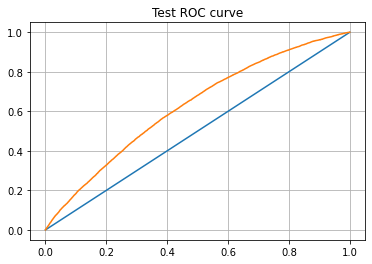

In [176]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [177]:
confusion_matrix(y_test,y_test_pred)

array([[52779,    83],
       [14714,    56]], dtype=int64)

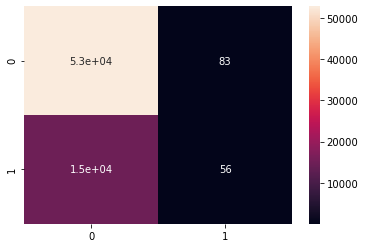

In [178]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [179]:
# FNs are too high, TPs are too low. Maybe Applying SMOT and balancing the data migh help.

In [180]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     52862
           1       0.40      0.00      0.01     14770

    accuracy                           0.78     67632
   macro avg       0.59      0.50      0.44     67632
weighted avg       0.70      0.78      0.69     67632



In [181]:
# For 1s the f1 score is really low

In [182]:
# Before computing the binary log loss, we need to perform caliberation

# https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html

from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lr, cv=3, method='isotonic')
model_isotonic.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=42,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [183]:
isotonic_predict_prob_test = model_isotonic.predict_proba(X_test)

In [184]:
log_loss(y_test,isotonic_predict_prob_test)

0.5083174806517012

#### Using SMOTE to handle imbalance

In [185]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_tf,y_tf = smote.fit_resample(X,y)
X_tf.shape, y_tf.shape



((352956, 16), (352956,))

In [186]:
X_tf = sc.fit_transform(X_tf)
x_train,x_test,y_train,y_test = train_test_split(X_tf,y_tf,test_size = 0.3, random_state = 3300)

In [187]:
lr1 = LogisticRegression(solver='liblinear',random_state=42)
lr1.fit(x_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [188]:
y_train_pred = lr1.predict(x_train)
y_test_pred = lr1.predict(x_test)
y_train_prob = lr1.predict_proba(x_train)
y_test_prob = lr1.predict_proba(x_test)

In [189]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.7034239724923355
The test AUC score is: 0.7035581678950622


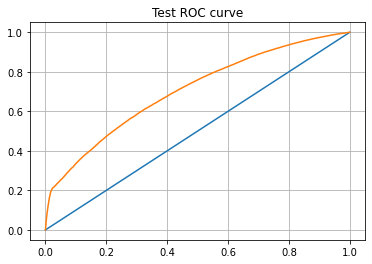

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [191]:
confusion_matrix(y_test,y_test_pred)

array([[37560, 15719],
       [22155, 30453]], dtype=int64)

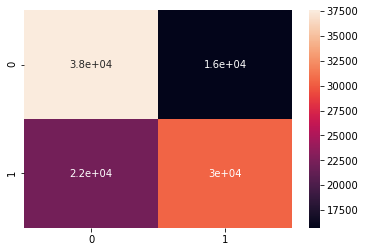

In [192]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [193]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.63      0.70      0.66     53279
           1       0.66      0.58      0.62     52608

    accuracy                           0.64    105887
   macro avg       0.64      0.64      0.64    105887
weighted avg       0.64      0.64      0.64    105887



In [194]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lr1, cv=3, method='isotonic')
model_isotonic.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=42,
                                                         solver='liblinear'),
                       cv=3, method='isotonic')

In [195]:
isotonic_predict_prob_test = model_isotonic.predict_proba(x_test)

In [196]:
log_loss(y_test,isotonic_predict_prob_test)

0.6160696187523984

In [197]:
print('The test accuracy is:',accuracy_score(y_test,y_test_pred))

The test accuracy is: 0.6423168094289196


### Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()

param_dist = {'n_estimators': sp_randint(100,500),
             'max_depth': sp_randint(2, 15),
             'min_samples_leaf': sp_randint(1, 18),
             'min_samples_split': sp_randint(2, 18)}

rsearch = RandomizedSearchCV(rfc, param_distributions=param_dist, 
        scoring='roc_auc',  n_iter=100, cv=3, n_jobs=-1, random_state=220)

rsearch.fit(x_train, y_train)
rsearch.best_params_

In [ ]:
rsearch.best_params_={'max_depth': 14,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 225}

In [199]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=300)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=225, random_state=300)

In [200]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
y_train_prob = rfc.predict_proba(x_train)
y_test_prob = rfc.predict_proba(x_test)

In [201]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8243189043814974
The test AUC score is: 0.7793269004026182


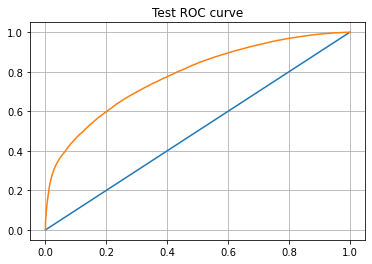

In [202]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [203]:
confusion_matrix(y_test,y_test_pred)

array([[40794, 12485],
       [19072, 33536]], dtype=int64)

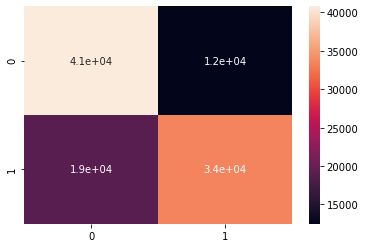

In [204]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [205]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.68      0.77      0.72     53279
           1       0.73      0.64      0.68     52608

    accuracy                           0.70    105887
   macro avg       0.71      0.70      0.70    105887
weighted avg       0.70      0.70      0.70    105887



In [206]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(rfc, cv=3, method='isotonic')
model_isotonic.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=14,
                                                             min_samples_leaf=3,
                                                             min_samples_split=5,
                                                             n_estimators=225,
                                                             random_state=300),
                       cv=3, method='isotonic')

In [207]:
isotonic_predict_prob_test = model_isotonic.predict_proba(x_test)
log_loss(y_test,isotonic_predict_prob_test)

0.555671524610137

In [208]:
print('The test accuracy is:',accuracy_score(y_test,y_test_pred))

The test accuracy is: 0.7019747466638964


### LightGBM

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

lgbmc = lgb.LGBMClassifier(random_state=220,n_jobs=-1)

params = {'n_estimators': sp_randint(100, 500),
          'max_depth': sp_randint(1, 20),
          'learning_rate': sp_uniform(0, 0.3),
          'num_leaves':sp_randint(10,30)}

rsearch = RandomizedSearchCV(lgbmc, param_distributions=params, 
        cv=3, n_iter=300, scoring='roc_auc', random_state=220, n_jobs=-1)

rsearch.fit(x_train, y_train)
rsearch.best_params_

In [ ]:
rsearch.best_params_={'learning_rate': 0.21556042769128472,
 'max_depth': 14,
 'n_estimators': 418,
 'num_leaves': 28}

In [215]:
lgbmc = lgb.LGBMClassifier(**rsearch.best_params_, importance_type='gain',random_state=300)
lgbmc.fit(x_train, y_train)

LGBMClassifier(importance_type='gain', learning_rate=0.21556042769128472,
               max_depth=14, n_estimators=418, num_leaves=28, random_state=300)

In [216]:
y_train_pred = lgbmc.predict(x_train)
y_test_pred = lgbmc.predict(x_test)
y_train_prob = lgbmc.predict_proba(x_train)
y_test_prob = lgbmc.predict_proba(x_test)

In [217]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8352358206276361
The test AUC score is: 0.790800121985872


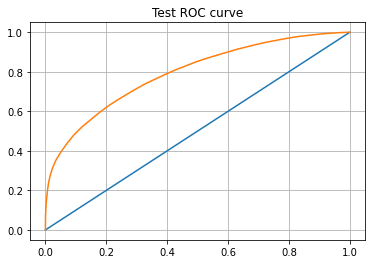

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [219]:
confusion_matrix(y_test,y_test_pred)

array([[40835, 12444],
       [18202, 34406]], dtype=int64)

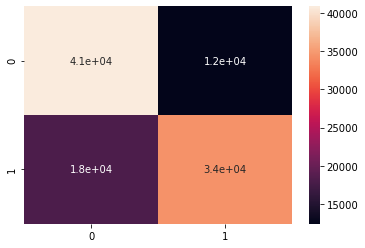

In [220]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [221]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     53279
           1       0.73      0.65      0.69     52608

    accuracy                           0.71    105887
   macro avg       0.71      0.71      0.71    105887
weighted avg       0.71      0.71      0.71    105887



In [224]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(lgbmc, cv=3, method='isotonic')
model_isotonic.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=LGBMClassifier(importance_type='gain',
                                                     learning_rate=0.21556042769128472,
                                                     max_depth=14,
                                                     n_estimators=418,
                                                     num_leaves=28,
                                                     random_state=300),
                       cv=3, method='isotonic')

In [225]:
isotonic_predict_prob_test = model_isotonic.predict_proba(x_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5393876760866495

In [226]:
print('The test accuracy is:',accuracy_score(y_test,y_test_pred))

The test accuracy is: 0.7105782579542342


### XGBoost

import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

xgbc = XGBClassifier(random_state=220,n_jobs=-1)

params = {'n_estimators': sp_randint(100, 400),
          'max_depth': sp_randint(1, 10),
          'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2],
          'gamma':[i/10.0 for i in range(2,4)],
         'reg_alpha':[0, 0.01, 0.05, 0.1, 0.5],
         'eval_metric':['auc']}

rsearch = RandomizedSearchCV(xgbc, param_distributions=params, 
        cv=3, n_iter=100, scoring='roc_auc', random_state=220, n_jobs=-1)

rsearch.fit(x_train, y_train)
rsearch.best_params_


In [ ]:
rsearch.best_params_={'eval_metric': 'auc',
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 8,
 'n_estimators': 337,
 'reg_alpha': 0.05}

In [215]:
xgbc = XGBClassifier(**rsearch.best_params_, random_state=300)
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0.2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=337, n_jobs=4,
              num_parallel_tree=1, random_state=300, reg_alpha=0.05,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [216]:
y_train_pred = xgbc.predict(x_train)
y_test_pred = xgbc.predict(x_test)
y_train_prob = xgbc.predict_proba(x_train)
y_test_prob = xgbc.predict_proba(x_test)

In [217]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8867085670755975
The test AUC score is: 0.8123128243267583


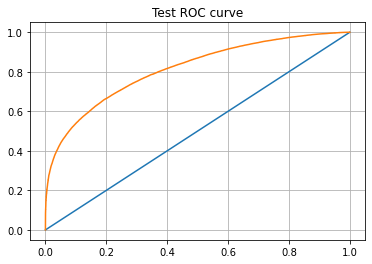

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [219]:
confusion_matrix(y_test,y_test_pred)

array([[41521, 11758],
       [16595, 36013]], dtype=int64)

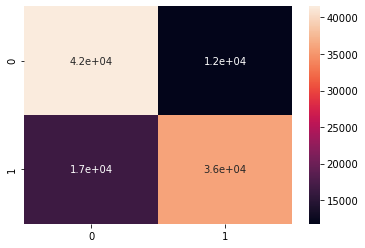

In [220]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [221]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.71      0.78      0.75     53279
           1       0.75      0.68      0.72     52608

    accuracy                           0.73    105887
   macro avg       0.73      0.73      0.73    105887
weighted avg       0.73      0.73      0.73    105887



In [222]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(xgbc, cv=3, method='isotonic')
model_isotonic.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    eval_metric='auc',
                                                    gamma=0.2, gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.2,
                                                    max_delta_step=0,
                                                    max_depth=8,
                                                    min_child_weight=1,
                                                    missing=nan,
 

In [223]:
isotonic_predict_prob_test = model_isotonic.predict_proba(x_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5182933160292702

In [224]:
print('The test accuracy is:',accuracy_score(y_test,y_test_pred))

The test accuracy is: 0.7322334186444039


### Stacking

In [198]:
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [201]:
from sklearn.ensemble import StackingClassifier
estimators = [
('rfc',RandomForestClassifier(max_depth = 14,
 min_samples_leaf = 3,
 min_samples_split = 5,
 n_estimators = 225)),
 
('lgbmc',lgb.LGBMClassifier(learning_rate = 0.21556042769128472,
 max_depth = 14,
 n_estimators = 418,
 num_leaves = 28)),
 
('xgbc', XGBClassifier(eval_metric = 'auc',
 gamma = 0.2,
 learning_rate = 0.2,
 max_depth = 8,
 n_estimators = 337,
 reg_alpha = 0.05))
]


In [202]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(solver='liblinear'),
                        cv = 5, n_jobs=-1)
clf.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(max_depth=14,
                                                       min_samples_leaf=3,
                                                       min_samples_split=5,
                                                       n_estimators=225)),
                               ('lgbmc',
                                LGBMClassifier(learning_rate=0.21556042769128472,
                                               max_depth=14, n_estimators=418,
                                               num_leaves=28)),
                               ('xgbc',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_byt...
                                              max_delta_

In [203]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
y_train_prob = clf.predict_proba(x_train)
y_test_prob = clf.predict_proba(x_test)

In [204]:
print('The train AUC score is:',roc_auc_score(y_train,y_train_prob[:,1]))
print('The test AUC score is:',roc_auc_score(y_test,y_test_prob[:,1]))

The train AUC score is: 0.8839725191822354
The test AUC score is: 0.808017697497277


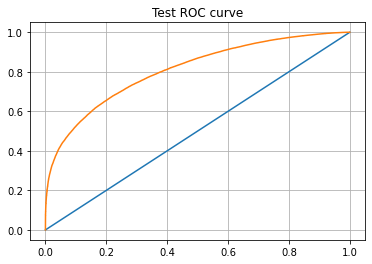

In [205]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:,1])
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.grid()
plt.title('Test ROC curve')
plt.show()

In [206]:
confusion_matrix(y_test,y_test_pred)

array([[40640, 12639],
       [16268, 36340]], dtype=int64)

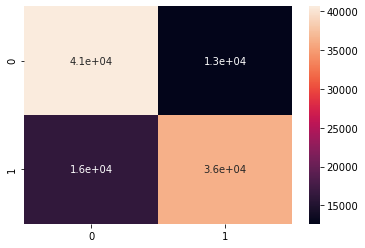

In [207]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [208]:
from sklearn.metrics import classification_report
print('Test Classification Report\n')
print(classification_report(y_test,y_test_pred))

Test Classification Report

              precision    recall  f1-score   support

           0       0.71      0.76      0.74     53279
           1       0.74      0.69      0.72     52608

    accuracy                           0.73    105887
   macro avg       0.73      0.73      0.73    105887
weighted avg       0.73      0.73      0.73    105887



In [209]:
from sklearn.calibration import CalibratedClassifierCV
model_isotonic = CalibratedClassifierCV(clf, cv=3, method='isotonic')
model_isotonic.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=StackingClassifier(cv=5,
                                                         estimators=[('rfc',
                                                                      RandomForestClassifier(max_depth=14,
                                                                                             min_samples_leaf=3,
                                                                                             min_samples_split=5,
                                                                                             n_estimators=225)),
                                                                     ('lgbmc',
                                                                      LGBMClassifier(learning_rate=0.21556042769128472,
                                                                                     max_depth=14,
                                                                                     n_estimators=418,
            

In [210]:
isotonic_predict_prob_test = model_isotonic.predict_proba(x_test)
log_loss(y_test,isotonic_predict_prob_test)

0.5219747359693366

In [211]:
print('The test accuracy is:',accuracy_score(y_test,y_test_pred))

The test accuracy is: 0.7270014260485235


In [212]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model","Test-AUC","Test-Log_Loss","F1-Score(1)","Test_Accuracy"]

x.add_row(["Logistic Regression", 0.702, 0.616, 0.61, 0.64])
x.add_row(["Random Forest Classifier", 0.779, 0.555, 0.68, 0.701])
x.add_row(["LGBM Classifier",0.790,0.539,0.69,0.71])
x.add_row(["XGBoost Classifier",0.812,0.518,0.72,0.732])
x.add_row(["Stacking Classifier",0.808,0.521,0.72,0.727])

print(x)

+--------------------------+----------+---------------+-------------+---------------+
|          Model           | Test-AUC | Test-Log_Loss | F1-Score(1) | Test_Accuracy |
+--------------------------+----------+---------------+-------------+---------------+
|   Logistic Regression    |  0.702   |     0.616     |     0.61    |      0.64     |
| Random Forest Classifier |  0.779   |     0.555     |     0.68    |     0.701     |
|     LGBM Classifier      |   0.79   |     0.539     |     0.69    |      0.71     |
|    XGBoost Classifier    |  0.812   |     0.518     |     0.72    |     0.732     |
|   Stacking Classifier    |  0.808   |     0.521     |     0.72    |     0.727     |
+--------------------------+----------+---------------+-------------+---------------+
